Sports Analytics
==================

**Using Fifa17 Official Dataset Predict Player Performance**

__The dataset contains 63 columns, each representing a different attribute of a football player.__

## Columns

**ID**: A unique identifier for each player.  
**Name**: The player's full name.  
**Age**: The player's age.  
**Photo**: A URL to the player's photo.  
**Nationality**: The player's nationality.  
**Flag**: A URL to the flag of the player's country.  
**Overall**: The player's overall rating based on various attributes.  
**Potential**: The player's potential rating, which indicates their peak performance.  
**Club**: The name of the club the player is currently playing for.  
**Club Logo**: A URL to the logo of the player's club.  
**Value**: The player's estimated market value.  
**Wage**: The player's weekly wage.  
**Special**: A special rating based on how unique or outstanding the player's skills are.  
**Preferred Foot**: Whether the player prefers their left or right foot.  
**International Reputation**: A score indicating the player's international reputation (higher means more well-known globally).  
**Weak Foot**: The player's skill level with their non-dominant foot.  
**Skill Moves**: The player's proficiency with skill moves (rated out of 5 stars).  
**Work Rate**: The player's work rate in both attack and defense (e.g., "High/Medium").  
**Body Type**: The player's physical build (e.g., lean, stocky).  
**Real Face**: Whether the player's face is realistically rendered in the game (True/False).  
**Position**: The player's primary playing position (e.g., ST, CM).  
**Jersey Number**: The player's squad number.  
**Joined**: The date the player joined their current club.  
**Loaned From**: The club the player is loaned from (if applicable).  
**Contract Valid Until**: The year the player's contract with their current club expires.  
**Height**: The player's height (in feet and inches).  
**Weight**: The player's weight (in pounds).  
**Crossing**: The player's ability to deliver accurate crosses.  
**Finishing**: The player's ability to score from chances.  
**HeadingAccuracy**: The player's accuracy with headers.  
**ShortPassing**: The player's ability to pass the ball accurately over short distances.  
**Volleys**: The player's ability to strike the ball mid-air (volleys).  
**Dribbling**: The player's ability to move with the ball while controlling it closely.  
**Curve**: The player's ability to bend the ball in the air (curve shots or passes).  
**FKAccuracy**: The player's ability to take accurate free kicks.  
**LongPassing**: The player's ability to deliver long-distance passes accurately.  
**BallControl**: The player's ability to control the ball in various situations.  
**Acceleration**: How quickly the player can reach top speed.  
**SprintSpeed**: The player's top running speed.  
**Agility**: How quickly the player can change direction.  
**Reactions**: The player's reaction time to in-game events.  
**Balance**: The player's ability to maintain balance, especially in duels or when dribbling.  
**ShotPower**: The power behind the player's shots.  
**Jumping**: The player's jumping ability.  
**Stamina**: The player's endurance, representing how long they can maintain their energy.  
**Strength**: The player's physical strength in duels.  
**LongShots**: The player's accuracy when shooting from long distances.  
**Aggression**: The player's intensity in challenging for the ball.  
**Interceptions**: The player's ability to read the game and intercept passes.  
**Positioning**: The player's ability to position themselves well on the field.  
**Vision**: The player's awareness of their teammates' positions.  
**Penalties**: The player's accuracy in taking penalty kicks.  
**Composure**: The player's ability to remain calm under pressure.  
**Marking**: The player's ability to mark opponents effectively.  
**StandingTackle**: The player's skill at standing tackles.  
**SlidingTackle**: The player's skill at sliding tackles.  
**GKDiving**: (Goalkeepers only) The goalkeeper's diving ability.  
**GKHandling**: (Goalkeepers only) The goalkeeper's ability to catch the ball.  
**GKKicking**: (Goalkeepers only) The goalkeeper's kicking accuracy and distance.  
**GKPositioning**: (Goalkeepers only) The goalkeeper's positioning awareness.  
**GKReflexes**: (Goalkeepers only) The goalkeeper's reaction speed.  
**Best Position**: The player's best-suited position on the field.  
**Best Overall Rating**: The player's highest rating based on different positions.

## Imports & Data Input

In [384]:
import re
import math
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# To prevent the output from being truncated
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [385]:
df = pd.read_csv("FIFA17_official_data.csv")

# Preliminary Data Analysis

## Data Understanding

In [386]:
print("Number of rows: ",df.shape[0])
print("Number of columns: ",df.shape[1])

Number of rows:  17560
Number of columns:  63


<b> The dataset contains data for 17,560 players, with 63 different features for each player. </b>

In [387]:
df.head()

ID            Name  Age  \
0  176580       L. Suárez   29   
1  178518   R. Nainggolan   28   
2  181872        A. Vidal   29   
3  197445        D. Alaba   24   
4  195864        P. Pogba   23   

                                              Photo Nationality  \
0  https://cdn.sofifa.com/players/176/580/17_60.png     Uruguay   
1  https://cdn.sofifa.com/players/178/518/17_60.png     Belgium   
2  https://cdn.sofifa.com/players/181/872/17_60.png       Chile   
3  https://cdn.sofifa.com/players/197/445/17_60.png     Austria   
4  https://cdn.sofifa.com/players/195/864/17_60.png      France   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.com/flags/uy.png       92         92       FC Barcelona   
1  https://cdn.sofifa.com/flags/be.png       86         86               Roma   
2  https://cdn.sofifa.com/flags/cl.png       87         87  FC Bayern München   
3  https://cdn.sofifa.com/flags/at.png       86         89  FC Bayern München   
4  https://cdn.sofifa.com/flags/fr.png       88         94  Manchester United   

                                       Club Logo   Value   Wage  Special  \
0  https://cdn.sofifa.com/teams/241/light_30.png    €83M  €525K     2291   
1   https://cdn.sofifa.com/teams/52/light_30.png  €37.5M  €130K     2290   
2   https://cdn.sofifa.com/teams/21/light_30.png  €41.5M  €180K     2285   
3   https://cdn.sofifa.com/teams/21/light_30.png  €41.5M  €140K     2279   
4   https://cdn.sofifa.com/teams/11/light_30.png  €71.5M  €225K     2271   

  Preferred Foot  International Reputation  Weak Foot  Skill Moves  \
0          Right                       5.0        4.0          4.0   
1          Right                       3.0        3.0          3.0   
2          Right                       4.0        4.0          3.0   
3           Left                       4.0        4.0          3.0   
4          Right                       4.0        4.0          5.0   

      Work Rate         Body Type Real Face                     Position  \
0  High/ Medium  Normal (170-185)       Yes   <span class="pos pos25">ST   
1    High/ High  Stocky (170-185)        No   <span class="pos pos22">LF   
2    High/ High  Normal (170-185)       Yes  <span class="pos pos11">LDM   
3  High/ Medium    Lean (170-185)       Yes    <span class="pos pos7">LB   
4  High/ Medium       Lean (185+)       Yes  <span class="pos pos11">LDM   

   Jersey Number        Joined Loaned From Contract Valid Until Height  \
0            9.0  Jul 11, 2014         NaN                 2021    6'0   
1            4.0   Jan 7, 2014         NaN                 2021    5'9   
2           23.0  Jul 28, 2015         NaN                 2019   5'11   
3           27.0  Feb 10, 2010         NaN                 2021   5'11   
4            6.0   Aug 9, 2016         NaN                 2021    6'3   

   Weight  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  \
0  190lbs      77.0       94.0             77.0          83.0     88.0   
1  143lbs      73.0       76.0             59.0          84.0     75.0   
2  165lbs      76.0       77.0             81.0          84.0     78.0   
3  168lbs      82.0       63.0             75.0          83.0     68.0   
4  185lbs      78.0       71.0             73.0          85.0     84.0   

   Dribbling  Curve  FKAccuracy  LongPassing  BallControl  Acceleration  \
0       86.0   86.0        84.0         64.0         91.0          88.0   
1       80.0   73.0        68.0         81.0         85.0          81.0   
2       76.0   76.0        68.0         82.0         83.0          77.0   
3       79.0   78.0        83.0         80.0         83.0          86.0   
4       89.0   84.0        82.0         88.0         90.0          75.0   

   SprintSpeed  Agility  Reactions  Balance  ShotPower  Jumping  Stamina  \
0         77.0     86.0       93.0     60.0       87.0     69.0     89.0   
1         78.0     81.0       87.0     84.0       84.0     76.0     94.0   
2       

In [388]:
# single record
df.head(1).T

0
ID                                                                  176580
Name                                                             L. Suárez
Age                                                                     29
Photo                     https://cdn.sofifa.com/players/176/580/17_60.png
Nationality                                                        Uruguay
Flag                                   https://cdn.sofifa.com/flags/uy.png
Overall                                                                 92
Potential                                                               92
Club                                                          FC Barcelona
Club Logo                    https://cdn.sofifa.com/teams/241/light_30.png
Value                                                                 €83M
Wage                                                                 €525K
Special                                                               2291
Preferred Foot                                                       Right
International Reputation                                               5.0
Weak Foot                                                              4.0
Skill Moves                                                            4.0
Work Rate                                                     High/ Medium
Body Type                                                 Normal (170-185)
Real Face                                                              Yes
Position                                        <span class="pos pos25">ST
Jersey Number                                                          9.0
Joined                                                        Jul 11, 2014
Loaned From                                                            NaN
Contract Valid Until                                                  2021
Height                                                                 6'0
Weight                                                              190lbs
Crossing                                                              77.0
Finishing                                                             94.0
HeadingAccuracy                                                       77.0
ShortPassing                                                          83.0
Volleys                                                               88.0
Dribbling                                                             86.0
Curve                                                                 86.0
FKAccuracy                                                            84.0
LongPassing                                                           64.0
BallControl                                                           91.0
Acceleration                                                          88.0
SprintSpeed                                                           77.0
Agility                                                               86.0
Reactions                                                             93.0
Balance                                                               60.0
ShotPower                                                             87.0
Jumping                                                               69.0
Stamina                                                               89.0
Strength                                                              80.0
LongShots                                                             86.0
Aggression                                                            78.0
Interceptions                                                         41.0
Positioning                                                           92.0
Vision                                                                84.0
Penalties                                                             85.0
Composure                                                             83.0
Marking                

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560 entries, 0 to 17559
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17560 non-null  int64  
 1   Name                      17560 non-null  object 
 2   Age                       17560 non-null  int64  
 3   Photo                     17560 non-null  object 
 4   Nationality               17560 non-null  object 
 5   Flag                      17560 non-null  object 
 6   Overall                   17560 non-null  int64  
 7   Potential                 17560 non-null  int64  
 8   Club                      17317 non-null  object 
 9   Club Logo                 17560 non-null  object 
 10  Value                     17560 non-null  object 
 11  Wage                      17560 non-null  object 
 12  Special                   17560 non-null  int64  
 13  Preferred Foot            17560 non-null  object 
 14  Intern

## Summary Statistics

In [390]:
# Describe numerical columns
df.describe().T

count           mean           std    min  \
ID                        17560.0  205606.310308  33102.038643   16.0   
Age                       17560.0      24.576310      4.653748   15.0   
Overall                   17560.0      66.155125      7.013210   45.0   
Potential                 17560.0      70.938326      6.140487   45.0   
Special                   17560.0    1595.468223    269.862012  751.0   
International Reputation  17560.0       1.111902      0.385032    1.0   
Weak Foot                 17560.0       2.935820      0.657838    1.0   
Skill Moves               17560.0       2.305410      0.746962    1.0   
Jersey Number             17541.0      20.411265     17.047842    1.0   
Crossing                  17560.0      49.778360     18.423713    6.0   
Finishing                 17560.0      45.209909     19.366051    2.0   
HeadingAccuracy           17560.0      52.382973     17.445995    4.0   
ShortPassing              17560.0      58.204442     14.874607   10.0   
Volleys                   17560.0      43.220444     17.684370    3.0   
Dribbling                 17560.0      54.891401     18.872939    4.0   
Curve                     17560.0      47.249374     18.415806    6.0   
FKAccuracy                17560.0      43.374886     17.657061    4.0   
LongPassing               17560.0      52.449658     15.501135    9.0   
BallControl               17560.0      58.027733     16.763558    5.0   
Acceleration              17560.0      65.148918     14.504689   11.0   
SprintSpeed               17560.0      65.383998     14.189398   11.0   
Agility                   17560.0      63.249943     14.607362   11.0   
Reactions                 17560.0      61.730866      9.225748   30.0   
Balance                   17560.0      63.990604     13.790504   10.0   
ShotPower                 17560.0      55.626879     17.523230    3.0   
Jumping                   17560.0      64.934738     11.489039   15.0   
Stamina                   17560.0      63.392654     15.563321   10.0   
Strength                  17560.0      65.075911     12.525802   21.0   
LongShots                 17560.0      47.394647     19.154503    4.0   
Aggression                17560.0      55.954328     17.435284    7.0   
Interceptions             17560.0      46.748804     20.513954    3.0   
Positioning               17560.0      49.632005     19.387491    2.0   
Vision                    17560.0      52.805866     14.472393   10.0   
Penalties                 17560.0      49.108371     15.824783    7.0   
Composure                 17560.0      55.979954     13.301553    5.0   
Marking                   17560.0      44.225399     21.532570    4.0   
StandingTackle            17560.0      47.460194     21.785704    3.0   
SlidingTackle             17560.0      45.540888     21.459058    5.0   
GKDiving                  17560.0      16.811333     17.796100    1.0   
GKHandling                17560.0      16.536731     16.953668    1.0   
GKKicking                 17560.0      16.441856     16.589324    1.0   
GKPositioning             17560.0      16.596185     17.137032    1.0   
GKReflexes                17560.0      16.887927     18.034308    1.0   
Best Overall Rating       17560.0      65.620615      6.940057   44.0   

                               25%       50%       75%       max  
ID                        191486.0  212936.0  229670.0  241056.0  
Age                           21.0      24.0      28.0      46.0  
Overall                       62.0      66.0      71.0      94.0  
Potential                     67.0      71.0      75.0      94.0  
Special                     1452.0    1633.0    1786.0    2291.0  
International Reputation       1.0       1.0       1.0       5.0  
Weak Foot                      3.0       3.0       3.0       5.0  
Skill Moves                    2.0       2.0       3.0       5.0  
Jersey Number                  9.0      18.0      27.0      99.0  
Crossing                      38.0      54.0      64.0      91.0  
Finis

In [391]:
# Describe categorical columns
df.describe(include='object').T

count unique  \
Name                  17560  16596   
Photo                 17560  17560   
Nationality           17560    160   
Flag                  17560    160   
Club                  17317    632   
Club Logo             17560    663   
Value                 17560    203   
Wage                  17560     41   
Preferred Foot        17560      2   
Work Rate             17560      9   
Body Type             17560     16   
Real Face             17560      2   
Position              17541     29   
Joined                15865   1720   
Loaned From            1333    316   
Contract Valid Until  17198     34   
Height                17560     21   
Weight                17560     56   
Best Position         17560     15   

                                                                   top   freq  
Name                                                      J. Rodríguez      9  
Photo                 https://cdn.sofifa.com/players/176/580/17_60.png      1  
Nationality                                                    England   1628  
Flag                           https://cdn.sofifa.com/flags/gb-eng.png   1628  
Club                                                      FC Barcelona     33  
Club Logo                https://cdn.sofifa.com/teams/241/light_30.png     33  
Value                                                            €1.2M    403  
Wage                                                               €2K   2916  
Preferred Foot                                                   Right  13468  
Work Rate                                               Medium/ Medium   9805  
Body Type                                             Normal (170-185)   6239  
Real Face                                                           No  16487  
Position                                   <span class="pos pos28">SUB   7659  
Joined                                                     Jul 1, 2016   1149  
Loaned From                          <a href="/team/52/roma/">Roma</a>     19  
Contract Valid Until                                              2018   4322  
Height                                                             6'0   2755  
Weight                                                          154lbs   1401  
Best Position                                                       CB   3672

# Data Cleaning

### Missing Values

#### Checking

In [392]:
missing_values = df.isna().sum()
missing_values_col = missing_values[missing_values > 0]
missing_values_col

Club                      243
Position                   19
Jersey Number              19
Joined                   1695
Loaned From             16227
Contract Valid Until      362
dtype: int64

i. **Club** column has **243** missing values, Club is used as an identifier, so we can't replace the missing value with median or mode. Therefore, we **drop** the rows having missing values.

ii. **Position** column has **19** missing values, we can fill the missing values with **Best Position**.

iii. **Jersey Number** column has **19** missing values, and it can be filled with available numbers within their respective clubs.

iv. **Loaned From** column has **16227** missing values out of 17560. So we can **drop** it.

v. **Joined** column has **1695** missing values. After extracting the 'year' we can replace the missing values with mode.

vi. **Contract Valid Until** column has **362** missing values, which we can replace with mode.

#### Handling

##### Club

In [393]:
df['Club'].isna().sum()

243

In [394]:
# Dopping the rows in 'Club' having missing values
df.dropna(subset=['Club'], inplace=True)

In [395]:
df['Club'].isna().sum()

0

##### Position

In [396]:
df['Position'].isna().sum()

0

We understand that players without 'Position' were the same players without a 'Club'.  
Since we already dropped the players without 'Club', the missing values issue for 'Position' was also resolved.

##### Jersey Number

In [397]:
df['Jersey Number'].isna().sum()

0

We understand that players without 'Jersey Number' were the same players without a 'Club'.  
Since we already dropped the players without 'Club', the missing values issue for 'Jersey Number' was also resolved.

##### Joined and Contract Valid Until

In [398]:
df[['Joined', 'Contract Valid Until']].isna().sum()

Joined                  1452
Contract Valid Until     119
dtype: int64

In [399]:
# extract the 'Year' from 'Joined' and 'Contract Valid Until' and update the respective columns inplace
df['Joined'] = df['Joined'].str.extract(r'\b(\d{4})\b')
df['Contract Valid Until'] = df['Contract Valid Until'].str.extract(r'\b(\d{4})\b')

In [400]:
# Fill missing values with mode
df['Joined']=df['Joined'].fillna(df['Joined'].mode() [0])
df['Contract Valid Until']=df['Contract Valid Until'].fillna(df['Contract Valid Until'].mode() [0])

# Change dtype from object to numeric
df['Joined'] = df['Joined'].astype('int64')
df['Contract Valid Until'] = df['Contract Valid Until'].astype('int64')

In [401]:
df[['Joined', 'Contract Valid Until']].isna().sum()

Joined                  0
Contract Valid Until    0
dtype: int64

### Duplicate Values

##### Rows

In [402]:
df.duplicated().sum()

0

##### Columns

In [403]:
df.columns.duplicated().sum()

0

### Handle inconsistent data formats (e.g., date columns, string formatting).

#### Formatting 'Value' and 'Wage'

##### Removing '€' symbol

In [404]:
# Checking whether all values are defined in Euros or not
df.loc[df['Value'].str.startswith('€')].shape[0] == df.shape[0]

True

In [405]:
# Checking whether all wages are defined in Euros or not
df.loc[df['Wage'].str.startswith('€')].shape[0] == df.shape[0]

True

In [406]:
# Splitting the value column to get just the numeric
df['Value'] = df['Value'].str.split('€')
df['Value'] = df['Value'].apply(lambda x:x[1])

In [407]:
#Splitting the wage column to get just the numeric
df['Wage'] = df['Wage'].str.split('€')
df['Wage'] = df['Wage'].apply(lambda x:x[1])

##### Converting all prices to millions

In [408]:
# Appending 'M' to 'Value'=0 and 'Wage'=0 
for i in range(len(df)):
    if(df.iloc[i, df.columns.get_loc('Value')]=='0'):
        df.iloc[i, df.columns.get_loc('Value')] = '0M'
    elif (df.iloc[i, df.columns.get_loc('Wage')]=='0'):
        df.iloc[i, df.columns.get_loc('Wage')] = '0M'

###### Value

In [409]:
# Dataframe of entries with 'Value' ending with 'K'
df_value_K = df.loc[df['Value'].str.endswith('K')]

# Dataframe of entries with 'Value' ending with 'M'
df_value_M = df.loc[df['Value'].str.endswith('M')]

In [410]:
df_value_K.head()

ID           Name  Age  \
263  142800   M. Velázquez   35   
397  188194      L. Ibáñez   27   
486  190557        G. Zusi   29   
509   52306       C. Brunt   31   
554   51100       S. Mauri   36   

                                                Photo       Nationality  \
263  https://cdn.sofifa.com/players/142/800/17_60.png         Argentina   
397  https://cdn.sofifa.com/players/188/194/17_60.png         Argentina   
486  https://cdn.sofifa.com/players/190/557/17_60.png     United States   
509  https://cdn.sofifa.com/players/052/306/17_60.png  Northern Ireland   
554  https://cdn.sofifa.com/players/051/100/17_60.png             Italy   

                                        Flag  Overall  Potential  \
263      https://cdn.sofifa.com/flags/ar.png       75         75   
397      https://cdn.sofifa.com/flags/ar.png       69         69   
486      https://cdn.sofifa.com/flags/us.png       70         70   
509  https://cdn.sofifa.com/flags/gb-nir.png       69         69   
554      https://cdn.sofifa.com/flags/it.png       73         73   

                     Club                                         Club Logo  \
263   Club Atlético Lanús  https://cdn.sofifa.com/teams/110395/light_30.png   
397           Trabzonspor     https://cdn.sofifa.com/teams/436/light_30.png   
486  Sporting Kansas City     https://cdn.sofifa.com/teams/696/light_30.png   
509  West Bromwich Albion     https://cdn.sofifa.com/teams/109/light_30.png   
554               Brescia     https://cdn.sofifa.com/teams/190/light_30.png   

    Value Wage  Special Preferred Foot  International Reputation  Weak Foot  \
263  625K  10K     2068           Left                       1.0        2.0   
397  825K  15K     2038           Left                       1.0        2.0   
486  975K   7K     2022          Right                       1.0        4.0   
509  650K  20K     2018           Left                       2.0        2.0   
554  325K   4K     2012           Left                       2.0        4.0   

     Skill Moves       Work Rate         Body Type Real Face  \
263          2.0     Low/ Medium  Normal (170-185)        No   
397          3.0    High/ Medium     Normal (170-)        No   
486          3.0      High/ High    Lean (170-185)       Yes   
509          3.0  Medium/ Medium     Normal (185+)       Yes   
554          3.0     Medium/ Low  Normal (170-185)        No   

                        Position  Jersey Number  Joined Loaned From  \
263   <span class="pos pos6">LCB            3.0    2012         NaN   
397  <span class="pos pos28">SUB           88.0    2016         NaN   
486    <span class="pos pos3">RB            8.0    2009         NaN   
509  <span class="pos pos28">SUB           11.0    2007         NaN   
554  <span class="pos pos18">CAM           23.0    2017         NaN   

     Contract Valid Until Height  Weight  Crossing  Finishing  \
263                  2017    5'9  159lbs      84.0       61.0   
397                  2019    5'7  161lbs      70.0       61.0   
486                  2017   5'10  159lbs      77.0       60.0   
509                  2018    6'2  187lbs      86.0       67.0   
554                  2017    6'0  174lbs      76.0       67.0   

     HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
263             61.0          75.0     62.0       66.0   78.0        77.0   
397             55.0          65.0     68.0       73.0   84.0        78.0   
486             58.0          75.0     65.0       71.0   82.0        70.0   
509             61.0          79.0     58.0       76.0   86.0        70.0   
554             79.0          73.0     86.0       73.0   76.0        72.0   

     LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
263         73.0         82.0          68.0         62.0     62.0       82.0   
397         67.0         75.0          79.0         82.0     83.0       68.0   
486         76.0         70.0          67.0         65.0     64.0       68.0   
50

In [411]:
df_value_M.head()

ID            Name  Age  \
0  176580       L. Suárez   29   
1  178518   R. Nainggolan   28   
2  181872        A. Vidal   29   
3  197445        D. Alaba   24   
4  195864        P. Pogba   23   

                                              Photo Nationality  \
0  https://cdn.sofifa.com/players/176/580/17_60.png     Uruguay   
1  https://cdn.sofifa.com/players/178/518/17_60.png     Belgium   
2  https://cdn.sofifa.com/players/181/872/17_60.png       Chile   
3  https://cdn.sofifa.com/players/197/445/17_60.png     Austria   
4  https://cdn.sofifa.com/players/195/864/17_60.png      France   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.com/flags/uy.png       92         92       FC Barcelona   
1  https://cdn.sofifa.com/flags/be.png       86         86               Roma   
2  https://cdn.sofifa.com/flags/cl.png       87         87  FC Bayern München   
3  https://cdn.sofifa.com/flags/at.png       86         89  FC Bayern München   
4  https://cdn.sofifa.com/flags/fr.png       88         94  Manchester United   

                                       Club Logo  Value  Wage  Special  \
0  https://cdn.sofifa.com/teams/241/light_30.png    83M  525K     2291   
1   https://cdn.sofifa.com/teams/52/light_30.png  37.5M  130K     2290   
2   https://cdn.sofifa.com/teams/21/light_30.png  41.5M  180K     2285   
3   https://cdn.sofifa.com/teams/21/light_30.png  41.5M  140K     2279   
4   https://cdn.sofifa.com/teams/11/light_30.png  71.5M  225K     2271   

  Preferred Foot  International Reputation  Weak Foot  Skill Moves  \
0          Right                       5.0        4.0          4.0   
1          Right                       3.0        3.0          3.0   
2          Right                       4.0        4.0          3.0   
3           Left                       4.0        4.0          3.0   
4          Right                       4.0        4.0          5.0   

      Work Rate         Body Type Real Face                     Position  \
0  High/ Medium  Normal (170-185)       Yes   <span class="pos pos25">ST   
1    High/ High  Stocky (170-185)        No   <span class="pos pos22">LF   
2    High/ High  Normal (170-185)       Yes  <span class="pos pos11">LDM   
3  High/ Medium    Lean (170-185)       Yes    <span class="pos pos7">LB   
4  High/ Medium       Lean (185+)       Yes  <span class="pos pos11">LDM   

   Jersey Number  Joined Loaned From  Contract Valid Until Height  Weight  \
0            9.0    2014         NaN                  2021    6'0  190lbs   
1            4.0    2014         NaN                  2021    5'9  143lbs   
2           23.0    2015         NaN                  2019   5'11  165lbs   
3           27.0    2010         NaN                  2021   5'11  168lbs   
4            6.0    2016         NaN                  2021    6'3  185lbs   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      77.0       94.0             77.0          83.0     88.0       86.0   
1      73.0       76.0             59.0          84.0     75.0       80.0   
2      76.0       77.0             81.0          84.0     78.0       76.0   
3      82.0       63.0             75.0          83.0     68.0       79.0   
4      78.0       71.0             73.0          85.0     84.0       89.0   

   Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  \
0   86.0        84.0         64.0         91.0          88.0         77.0   
1   73.0        68.0         81.0         85.0          81.0         78.0   
2   76.0        68.0         82.0         83.0          77.0         74.0   
3   78.0        83.0         80.0         83.0          86.0         86.0   
4   84.0        82.0         88.0         90.0          75.0         79.0   

   Agility  Reactions  Balance  ShotPower  Jumping  Stamina  Strength  \
0     86.0       93.0     60.0       87.0     69.0     89.0      80.0   
1     81.0       87.0     84.0       84.0     76.0    

In [412]:
# Converting the player value in thousand Euros to Million Euros and then stripping the end denote.
df_value_K.loc[:, 'Value'] = df_value_K['Value'].apply(lambda x: x[:-1])
df_value_K.loc[:, 'Value'] = df_value_K['Value'].astype('float64')
df_value_K.loc[:, 'Value'] = df_value_K['Value'] / 1000

# Stripping the end denote for Million Euros Player value
df_value_M.loc[:, 'Value'] = df_value_M.loc[:, 'Value'].apply(lambda x: x[:-1])
df_value_M.loc[:, 'Value'] = df_value_M['Value'].astype('float64')

###### Wage

In [413]:
# Checking if any value in df_value_K has 'Wage' which ends with 'M'
len(df_value_K.loc[df_value_K['Wage'].str.endswith("M")])

0

In [414]:
# Checking if any value in df_value_M has 'Wage' which ends with 'M'
len(df_value_M.loc[df_value_M['Wage'].str.endswith("M")])

0

In [415]:
# Converting the player wage in df_value_K in thousand Euros to Million Euros and then stripping the end denote.
df_value_K.loc[:, 'Wage'] = df_value_K['Wage'].apply(lambda x: x[:-1])
df_value_K.loc[:, 'Wage'] = df_value_K['Wage'].astype('float64')
df_value_K.loc[:, 'Wage'] = df_value_K['Wage'] / 1000

# Converting the player wage in df_value_M in thousand Euros to Million Euros and then stripping the end denote.
df_value_M.loc[:, 'Wage'] = df_value_M['Wage'].apply(lambda x: x[:-1])
df_value_M.loc[:, 'Wage'] = df_value_M['Wage'].astype('float64')
df_value_M.loc[:, 'Wage'] = df_value_M['Wage'] / 1000

##### Concatenating both the splitted up dataframes

In [416]:

df = pd.concat([df_value_M,df_value_K])
df['Value'] = df['Value'].astype('float64')
df['Wage'] = df['Wage'].astype('float64')
df.head()

ID            Name  Age  \
0  176580       L. Suárez   29   
1  178518   R. Nainggolan   28   
2  181872        A. Vidal   29   
3  197445        D. Alaba   24   
4  195864        P. Pogba   23   

                                              Photo Nationality  \
0  https://cdn.sofifa.com/players/176/580/17_60.png     Uruguay   
1  https://cdn.sofifa.com/players/178/518/17_60.png     Belgium   
2  https://cdn.sofifa.com/players/181/872/17_60.png       Chile   
3  https://cdn.sofifa.com/players/197/445/17_60.png     Austria   
4  https://cdn.sofifa.com/players/195/864/17_60.png      France   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.com/flags/uy.png       92         92       FC Barcelona   
1  https://cdn.sofifa.com/flags/be.png       86         86               Roma   
2  https://cdn.sofifa.com/flags/cl.png       87         87  FC Bayern München   
3  https://cdn.sofifa.com/flags/at.png       86         89  FC Bayern München   
4  https://cdn.sofifa.com/flags/fr.png       88         94  Manchester United   

                                       Club Logo  Value   Wage  Special  \
0  https://cdn.sofifa.com/teams/241/light_30.png   83.0  0.525     2291   
1   https://cdn.sofifa.com/teams/52/light_30.png   37.5  0.130     2290   
2   https://cdn.sofifa.com/teams/21/light_30.png   41.5  0.180     2285   
3   https://cdn.sofifa.com/teams/21/light_30.png   41.5  0.140     2279   
4   https://cdn.sofifa.com/teams/11/light_30.png   71.5  0.225     2271   

  Preferred Foot  International Reputation  Weak Foot  Skill Moves  \
0          Right                       5.0        4.0          4.0   
1          Right                       3.0        3.0          3.0   
2          Right                       4.0        4.0          3.0   
3           Left                       4.0        4.0          3.0   
4          Right                       4.0        4.0          5.0   

      Work Rate         Body Type Real Face                     Position  \
0  High/ Medium  Normal (170-185)       Yes   <span class="pos pos25">ST   
1    High/ High  Stocky (170-185)        No   <span class="pos pos22">LF   
2    High/ High  Normal (170-185)       Yes  <span class="pos pos11">LDM   
3  High/ Medium    Lean (170-185)       Yes    <span class="pos pos7">LB   
4  High/ Medium       Lean (185+)       Yes  <span class="pos pos11">LDM   

   Jersey Number  Joined Loaned From  Contract Valid Until Height  Weight  \
0            9.0    2014         NaN                  2021    6'0  190lbs   
1            4.0    2014         NaN                  2021    5'9  143lbs   
2           23.0    2015         NaN                  2019   5'11  165lbs   
3           27.0    2010         NaN                  2021   5'11  168lbs   
4            6.0    2016         NaN                  2021    6'3  185lbs   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      77.0       94.0             77.0          83.0     88.0       86.0   
1      73.0       76.0             59.0          84.0     75.0       80.0   
2      76.0       77.0             81.0          84.0     78.0       76.0   
3      82.0       63.0             75.0          83.0     68.0       79.0   
4      78.0       71.0             73.0          85.0     84.0       89.0   

   Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  \
0   86.0        84.0         64.0         91.0          88.0         77.0   
1   73.0        68.0         81.0         85.0          81.0         78.0   
2   76.0        68.0         82.0         83.0          77.0         74.0   
3   78.0        83.0         80.0         83.0          86.0         86.0   
4   84.0        82.0         88.0         90.0          75.0         79.0   

   Agility  Reactions  Balance  ShotPower  Jumping  Stamina  Strength  \
0     86.0       93.0     60.0       87.0     69.0     89.0      80.0   
1     81.0       87.0     84.0       84.0     76

#### Formatting 'Position'

In [417]:
# Sample Position value: <span class="pos pos25">ST
df['Position'] = df['Position'].apply(lambda x: re.sub(r'<[^>]+>', '', x))
df['Position'].unique()

array(['ST', 'LF', 'LDM', 'LB', 'RW', 'SUB', 'RCM', 'LW', 'RB', 'RDM',
       'RES', 'LCM', 'CDM', 'LM', 'CAM', 'RM', 'RS', 'LCB', 'RCB', 'CB',
       'CM', 'LS', 'RF', 'LWB', 'RAM', 'RWB', 'LAM', 'CF', 'GK'],
      dtype=object)

#### Formatting 'Weight'

In [418]:
# Function to convert weight to kg
def weight_to_kg(weight_in_lbs):
    # 1 lbs = 0.453592 kg 
    weight_in_kg = weight_in_lbs * 0.453592
    return round(weight_in_kg,2)

# Sample Weight value: 190lbs
df['Weight'] = df['Weight'].apply(lambda x : x[:-3])
df['Weight'] = df['Weight'].astype('int64')

# Apply the function to the 'Weight' column
df['Weight'] = df['Weight'].apply(weight_to_kg)

df['Weight'].unique()

array([ 86.18,  64.86,  74.84,  76.2 ,  83.91,  73.94,  67.13,  69.85,
        79.83,  73.03,  72.12,  68.04,  60.78,  77.11,  78.02,  89.81,
        83.01,  88.  ,  68.95,  62.14,  81.19,  88.9 ,  78.93,  66.22,
        91.17,  71.21,  59.87,  82.1 ,  63.05,  58.06,  94.8 ,  63.96,
        87.09,  84.82,  92.08,  93.89,  92.99,  57.15,  55.79,  58.97,
        96.16,  97.07,  54.88,  97.98,  53.98,  52.16,  98.88,  99.79,
       102.06,  49.9 ,  53.07, 110.22,  48.08,  48.99, 107.05, 101.15])

#### Formatting 'Height'

In [419]:
# Function to convert height to meters as a float
def height_to_meters(height):
    match = re.match(r"(\d+)'(\d+)", height)     # Extract feet and inches
    if match:
        # Sample Height value: 6'0
        feet = int(match.group(1))               # Extract feet as integer
        inches = int(match.group(2))             # Extract inches as integer
        total_inches = feet*12 + inches          # Convert feet to inches
        total_meters = total_inches * 0.0254     # 1 inch = 0.0254 m
        return round(total_meters,2)
    return None                                  # Return None if height format is invalid

# Apply the function to the 'Height' column
df['Height'] = df['Height'].apply(height_to_meters)
df['Height'].unique()

array([1.83, 1.75, 1.8 , 1.91, 1.73, 1.7 , 1.85, 1.78, 1.88, 1.68, 1.65,
       1.93, 1.96, 1.98, 1.63, 1.57, 1.6 , 2.01, 2.03, 1.55, 2.06])

### Splitting data into numerical and categorical columns

In [420]:
def split_data(df):
    num_df = df.select_dtypes(include='number')
    num_col = num_df.columns.tolist()
    print("Numerical Columns (",len(num_col),"): \n",num_col)

    cat_df = df.select_dtypes(include='object')
    cat_col = cat_df.columns.tolist()
    print("Catgeorical Columns(",len(cat_col),"): \n",cat_col)

    return num_df, num_col, cat_df, cat_col

num_df, num_col, cat_df, cat_col = split_data(df)

Numerical Columns ( 50 ): 
 ['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Overall Rating']
Catgeorical Columns( 13 ): 
 ['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Loaned From', 'Best Position']


In [422]:
# Export cleaned dataset to csv
# df.to_csv("FIFA17_official_data_cleaned.csv", index=False)

# Export cleaned dataset to excel
df.to_excel("FIFA17_official_data_cleaned.xlsx")

### Correlation Matrix

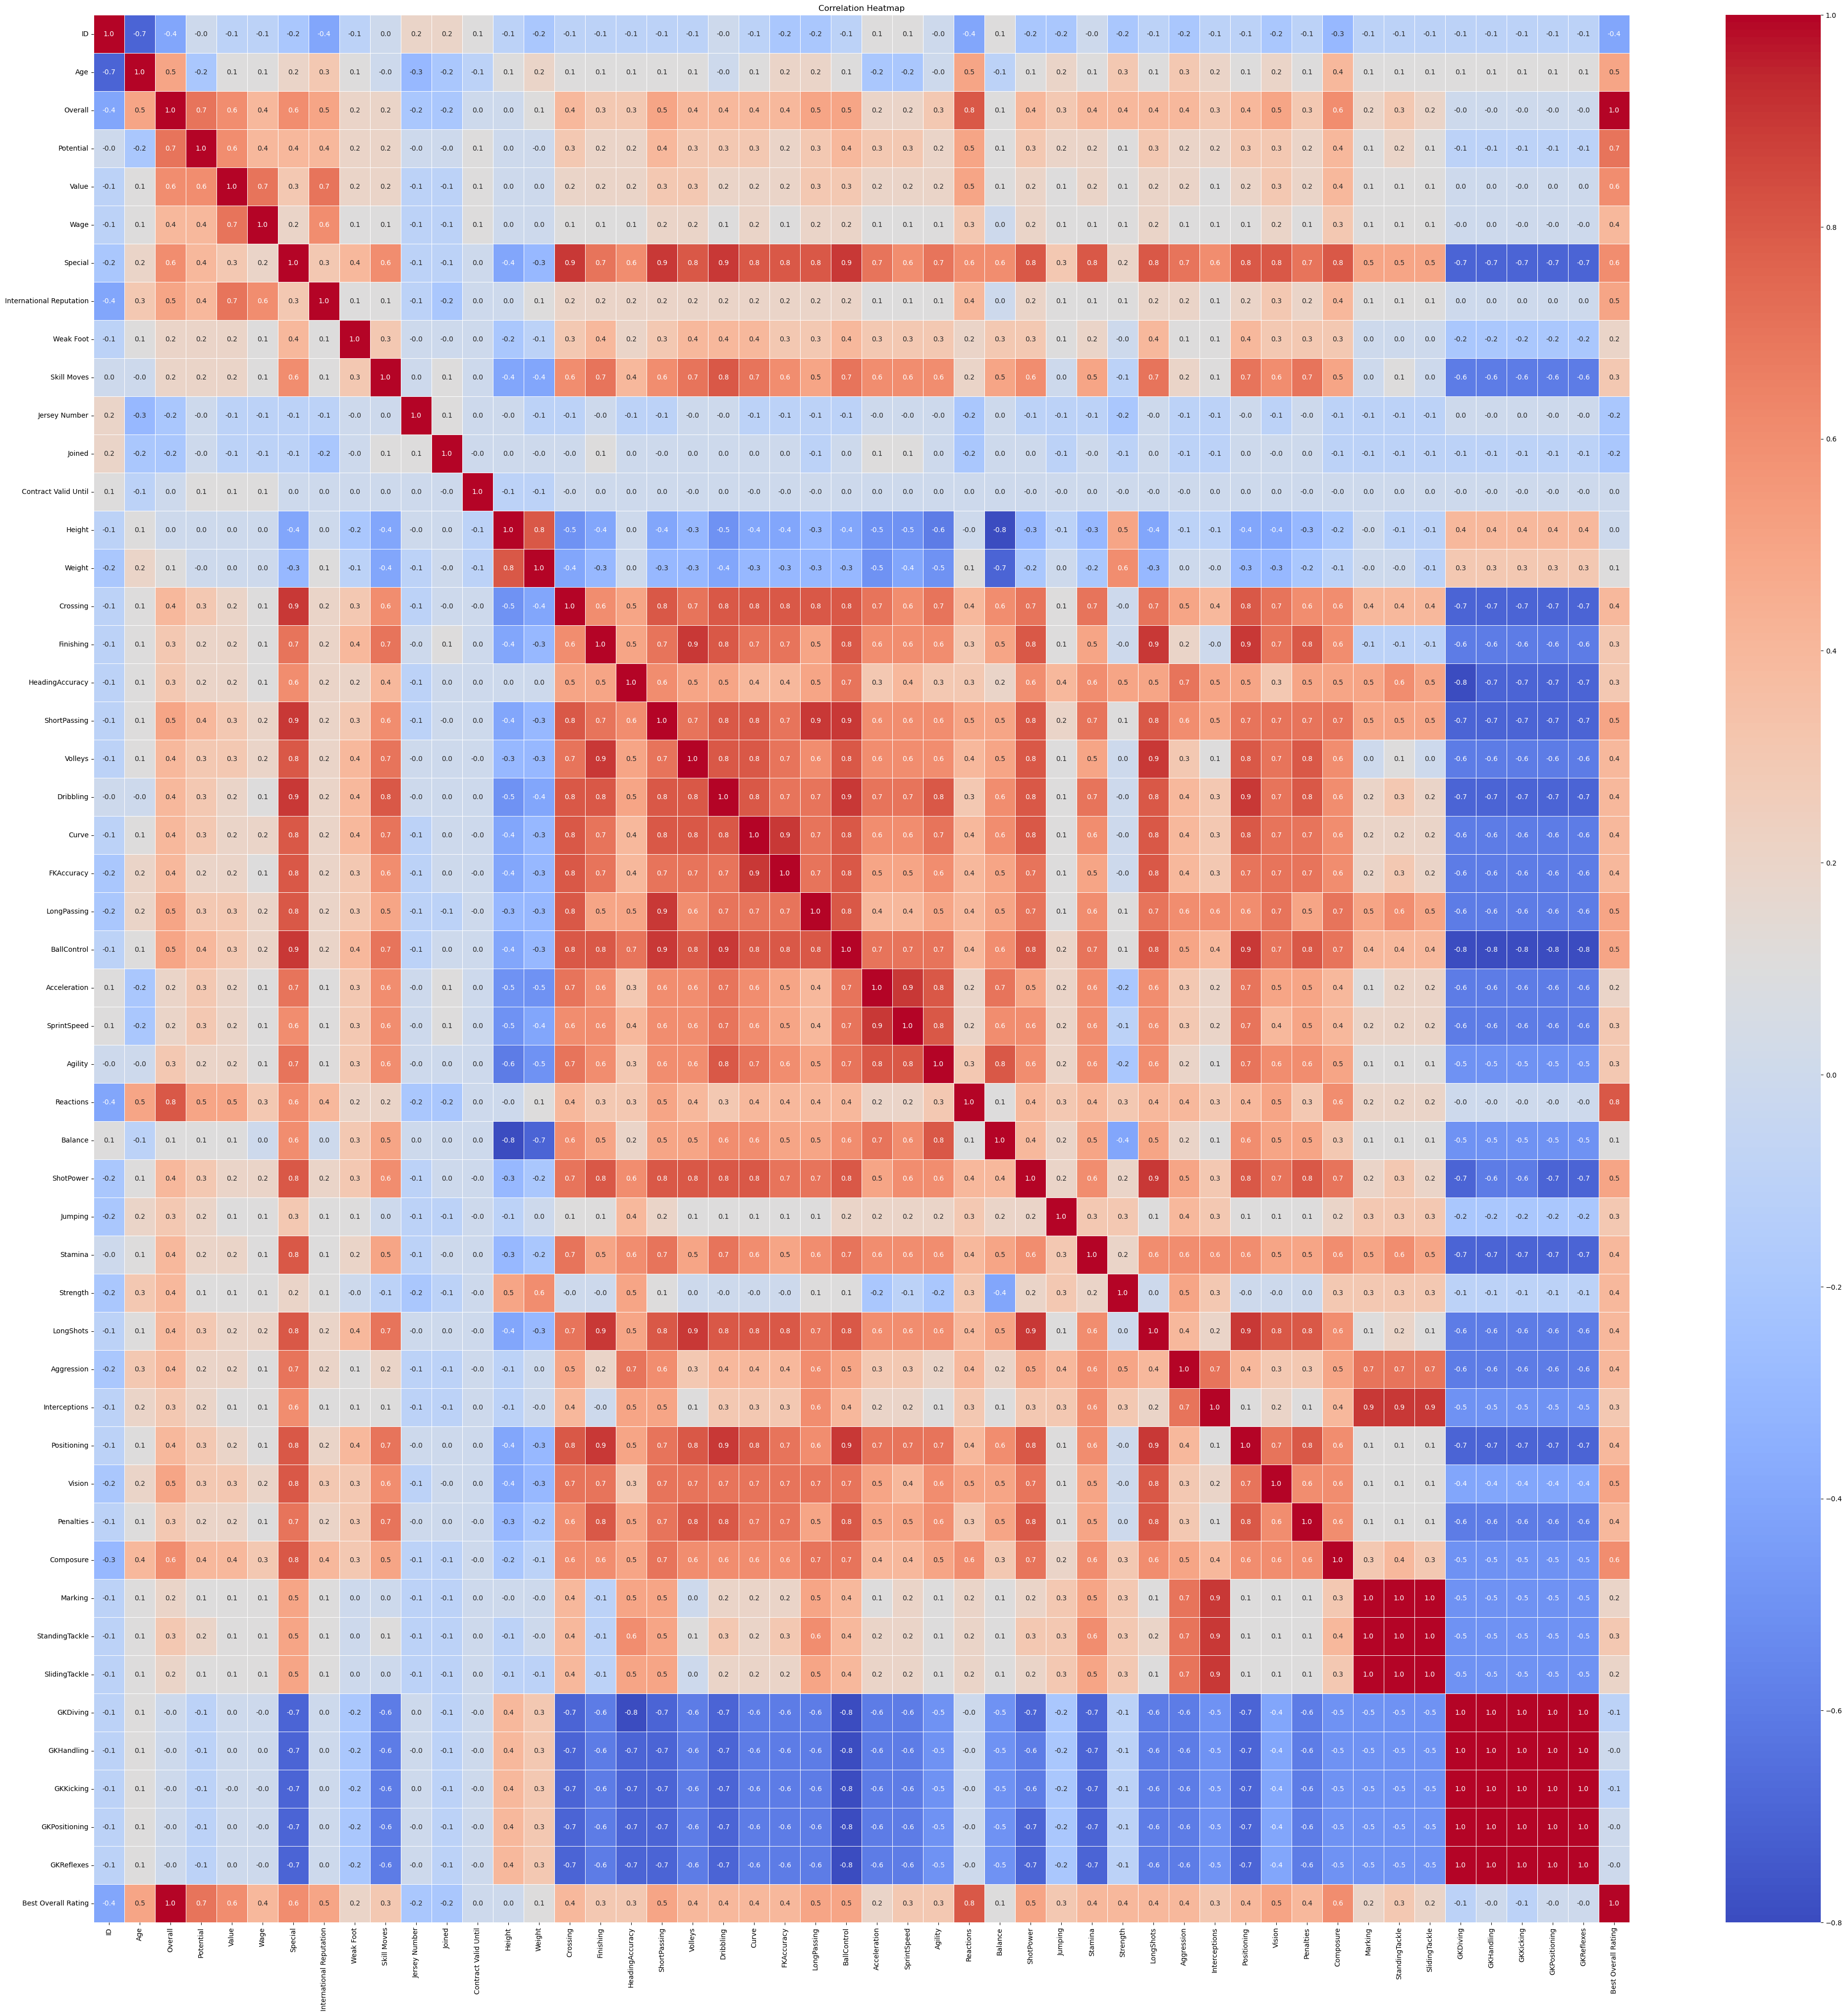

In [332]:
def corr_matrix(num_df, display_heatmap=False, save_as_image=False, save_as_csv=False):
    corr = num_df.corr().round(1)

    if (display_heatmap==True):
        # Plot the correlation matrix heatmap
        num_features = len(num_df.columns)
        plt.figure(figsize=(num_features, num_features))
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='0.1f', linewidth=0.5)
        if(save_as_image==True):
            plt.savefig(f'correlation_heatmap_{num_features}.png', dpi=300, bbox_inches='tight')
        plt.title("Correlation Heatmap")
        plt.show()

    # Export the correlation matrix to csv
    if save_as_csv==True:
        corr.to_csv(f"corr({num_features}).csv")
    return corr

corr = corr_matrix(num_df, True)

In [333]:
def high_corr_target_features(corr):
    # List of features highly correlated with target('Overall')
    
    high_threshold = 0.7  # Threshold
    high_corr_features = []
    
    # Iterate through the correlation matrix target column
    for row in corr.index:
        if row != 'Overall' and abs(corr.loc[row, 'Overall']) >= high_threshold:
            high_corr_features.append((row, 'Overall', corr.loc[row, 'Overall']))  # Append (row, target, correlation value)
    
    # # Remove duplicates (since correlation matrix is symmetric)
    # unique_high_corr_pairs = list(set([tuple(sorted(pair[:2])) + (pair[2],) for pair in high_corr_features]))
    
    # Display the results
    print(f"Highly correlated features with target ({len(high_corr_features)}):\n")
    for pair in high_corr_features:
        print(f"{pair[0]} ({pair[2]})")

    return high_corr_features


def mod_corr_target_features(corr):
    # List of features moderately correlated with target('Overall')

    high_threshold = 0.7
    moderate_threshold = 0.4  # Threshold
    mod_corr_features = []
    
    # Iterate through the correlation matrix target column
    for row in corr.index:
        if row != 'Overall' and abs(corr.loc[row, 'Overall']) >= moderate_threshold and abs(corr.loc[row, 'Overall']) < high_threshold:
            mod_corr_features.append((row, 'Overall', corr.loc[row, 'Overall']))  # Append (row, target, correlation value)
    
    # # Remove duplicates (since correlation matrix is symmetric)
    # unique_high_corr_pairs = list(set([tuple(sorted(pair[:2])) + (pair[2],) for pair in mod_corr_features]))
    
    print("\n------------------------------------------------------\n")
    # Display the results
    print(f"Moderately correlated features with target ({len(mod_corr_features)}):\n")
    for pair in mod_corr_features:
        print(f"{pair[0]} ({pair[2]})")

    return mod_corr_features

high_corr_features = high_corr_target_features(corr)
mod_corr_features = mod_corr_target_features(corr)

Highly correlated features with target (3):

Potential (0.7)
Reactions (0.8)
Best Overall Rating (1.0)

------------------------------------------------------

Moderately correlated features with target (22):

ID (-0.4)
Age (0.5)
Value (0.6)
Wage (0.4)
Special (0.6)
International Reputation (0.5)
Crossing (0.4)
ShortPassing (0.5)
Volleys (0.4)
Dribbling (0.4)
Curve (0.4)
FKAccuracy (0.4)
LongPassing (0.5)
BallControl (0.5)
ShotPower (0.4)
Stamina (0.4)
Strength (0.4)
LongShots (0.4)
Aggression (0.4)
Positioning (0.4)
Vision (0.5)
Composure (0.6)


In [334]:
# Extract only the column names from the lists
columns_with_considerable_corr = [feature[0] for feature in high_corr_features + mod_corr_features]
cols_to_drop = []

# Iterate through all columns and print those not in the list of columns to drop
print(f"Remainging number of columns: {df.shape[1]-len(columns_with_considerable_corr)}")
for col in df.columns:
    if col not in columns_with_considerable_corr and col in num_col and abs(corr.loc['Overall', col]) < 0.4:
        cols_to_drop.append(col)
        print(col)
    elif col not in columns_with_considerable_corr:
        print(col)

print(cols_to_drop)

Remainging number of columns: 38
Name
Photo
Nationality
Flag
Overall
Club
Club Logo
Preferred Foot
Weak Foot
Skill Moves
Work Rate
Body Type
Real Face
Position
Jersey Number
Joined
Loaned From
Contract Valid Until
Height
Weight
Finishing
HeadingAccuracy
Acceleration
SprintSpeed
Agility
Balance
Jumping
Interceptions
Penalties
Marking
StandingTackle
SlidingTackle
GKDiving
GKHandling
GKKicking
GKPositioning
GKReflexes
Best Position
['Weak Foot', 'Skill Moves', 'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Finishing', 'HeadingAccuracy', 'Acceleration', 'SprintSpeed', 'Agility', 'Balance', 'Jumping', 'Interceptions', 'Penalties', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


In [335]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

# # Function to calculate VIF
# def calculate_vif(df):
#     """
#     Calculate Variance Inflation Factor (VIF) for each feature in the dataframe.
#     Args:
#     df (pd.DataFrame): DataFrame containing numerical features.
    
#     Returns:
#     pd.DataFrame: DataFrame with features and their respective VIF values.
#     """
#     # Add a constant column for intercept calculation
#     df_with_const = add_constant(df)

#     # Calculate VIF for each feature
#     vif_data = pd.DataFrame()
#     vif_data['Feature'] = df.columns
#     vif_data['VIF'] = [variance_inflation_factor(df_with_const.values, i + 1) 
#                        for i in range(len(df.columns))]

#     return vif_data

# # Example usage
# vif_result = calculate_vif(num_df.drop(['Overall'],axis=1))
# print(vif_result)

In [336]:
def high_multicollinearity_features(corr):
    # List of features with possible severe multicollinearity
    threshold = 0.8  # Define the correlation threshold
    high_corr_pairs = []
    
    feat_corr = corr.drop(['Overall'],axis=1).drop(['Overall'], axis=0)
    
    # Iterate through the correlation matrix
    for col in feat_corr.columns:
        for row in feat_corr.index:
            if col != row and abs(feat_corr.loc[row, col]) > threshold:  # Avoid self-correlation
                high_corr_pairs.append((row, col, feat_corr.loc[row, col]))  # Append (row, col, correlation value)
    
    # Remove duplicates (since correlation matrix is symmetric)
    unique_high_corr_pairs = list(
        set([
            tuple(sorted(pair[:2])) + (pair[2],) for pair in high_corr_pairs
        ])
    )
    
    # Display the results
    for pair in sorted(unique_high_corr_pairs):
        print(f"{pair[0]} ({corr.loc[pair[0],'Overall']}) & {pair[1]} ({corr.loc[pair[1],'Overall']}) - Correlation: {pair[2]}")

high_multicollinearity_features(corr)

Acceleration (0.2) & SprintSpeed (0.2) - Correlation: 0.9
BallControl (0.5) & Dribbling (0.4) - Correlation: 0.9
BallControl (0.5) & Positioning (0.4) - Correlation: 0.9
BallControl (0.5) & ShortPassing (0.5) - Correlation: 0.9
BallControl (0.5) & Special (0.6) - Correlation: 0.9
Crossing (0.4) & Special (0.6) - Correlation: 0.9
Curve (0.4) & FKAccuracy (0.4) - Correlation: 0.9
Dribbling (0.4) & Positioning (0.4) - Correlation: 0.9
Dribbling (0.4) & Special (0.6) - Correlation: 0.9
Finishing (0.3) & LongShots (0.4) - Correlation: 0.9
Finishing (0.3) & Positioning (0.4) - Correlation: 0.9
Finishing (0.3) & Volleys (0.4) - Correlation: 0.9
GKDiving (-0.0) & GKHandling (-0.0) - Correlation: 1.0
GKDiving (-0.0) & GKKicking (-0.0) - Correlation: 1.0
GKDiving (-0.0) & GKPositioning (-0.0) - Correlation: 1.0
GKDiving (-0.0) & GKReflexes (-0.0) - Correlation: 1.0
GKHandling (-0.0) & GKKicking (-0.0) - Correlation: 1.0
GKHandling (-0.0) & GKPositioning (-0.0) - Correlation: 1.0
GKHandling (-0.0

In [337]:
cols_to_drop = cols_to_drop+['Acceleration','Dribbling','Positioning','Special','Curve','LongShots', 'Volleys',
                     'GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'Marking','SlidingTackle','StandingTackle',
                     'LongPassing']

# Iterate through all columns and print those not in the list of columns to drop
print(f"Remainging number of columns: {df.shape[1]-len(cols_to_drop)}")
for col in df.columns:
    if col not in columns_with_considerable_corr and col in num_col and abs(corr.loc['Overall', col]) < 0.4:
        cols_to_drop.append(col)
        print(col)
    elif col not in columns_with_considerable_corr:
        print(col)

Remainging number of columns: 24
Name
Photo
Nationality
Flag
Overall
Club
Club Logo
Preferred Foot
Weak Foot
Skill Moves
Work Rate
Body Type
Real Face
Position
Jersey Number
Joined
Loaned From
Contract Valid Until
Height
Weight
Finishing
HeadingAccuracy
Acceleration
SprintSpeed
Agility
Balance
Jumping
Interceptions
Penalties
Marking
StandingTackle
SlidingTackle
GKDiving
GKHandling
GKKicking
GKPositioning
GKReflexes
Best Position


#### Feature Selection Based on multi-collinearity and irrelevant columns

Columns to drop (27):

- **ID**: Does not add any predictive value.
- **Best Overall Rating**: has a correlation of 1 with target variable
- **Acceleration**: It is value that tracks the ability to move fast for short distances, whereas 'Sprint' give the players ability to moved fast over long distance and is more prominent for a player.
- **Positioning, Dribbling, ShortPassing, LongPassing**: Positioning focuses on the players ability to position themselves on the field, while dribbling focuses on movement while controlling the ball. However, 'BallControl' gives a better idea about the player's actual skill and overall control of the ball in different situations. Also, 'BallControl' has higher correlation with target variable.
- **Crossing**: Although Crossing is a direct attribute affecting gameplay, it's correlation with the target is low.
- **Special**: Although this feature has a high correlation with the target, because it is a derived feature it is less informative.
- **Curve**: FKAccuracy is more relevant than the players ability to curve the ball in the air
- **LongShots, Volleys**: These are not as important for goal scoring as 'Finishing'
- **GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes**: These are goalkeeper-specific attributes and they have 0 correlation with the target. 
- **Marking, StandingTackle, SlidingTackle**: Interceptions are broader. Also, 'Interceptions' has higher correlation with target variable.
- **Name, Photo, Nationality, Flag, Club, Club Logo, Real Face, Loaned From**: Does not add any predictive value.

In [338]:
# Dropping columns (55)
cols_to_drop = cols_to_drop+['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 
                             'Real Face', 'Loaned From', 'ID','Best Overall Rating']

df = df.drop(columns=cols_to_drop, axis=1)
num_df, num_col, cat_df, cat_col = split_data(df)

Numerical Columns ( 17 ): 
 ['Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 'Crossing', 'ShortPassing', 'FKAccuracy', 'BallControl', 'Reactions', 'ShotPower', 'Stamina', 'Strength', 'Aggression', 'Vision', 'Composure']
Catgeorical Columns( 5 ): 
 ['Preferred Foot', 'Work Rate', 'Body Type', 'Position', 'Best Position']


In [339]:
print(f"Total Number of columns: {df.shape[1]}")
print(f"Number of numerical columns: {num_df.shape[1]}")
print(f"Number of categorical columns: {cat_df.shape[1]}")

Total Number of columns: 22
Number of numerical columns: 17
Number of categorical columns: 5


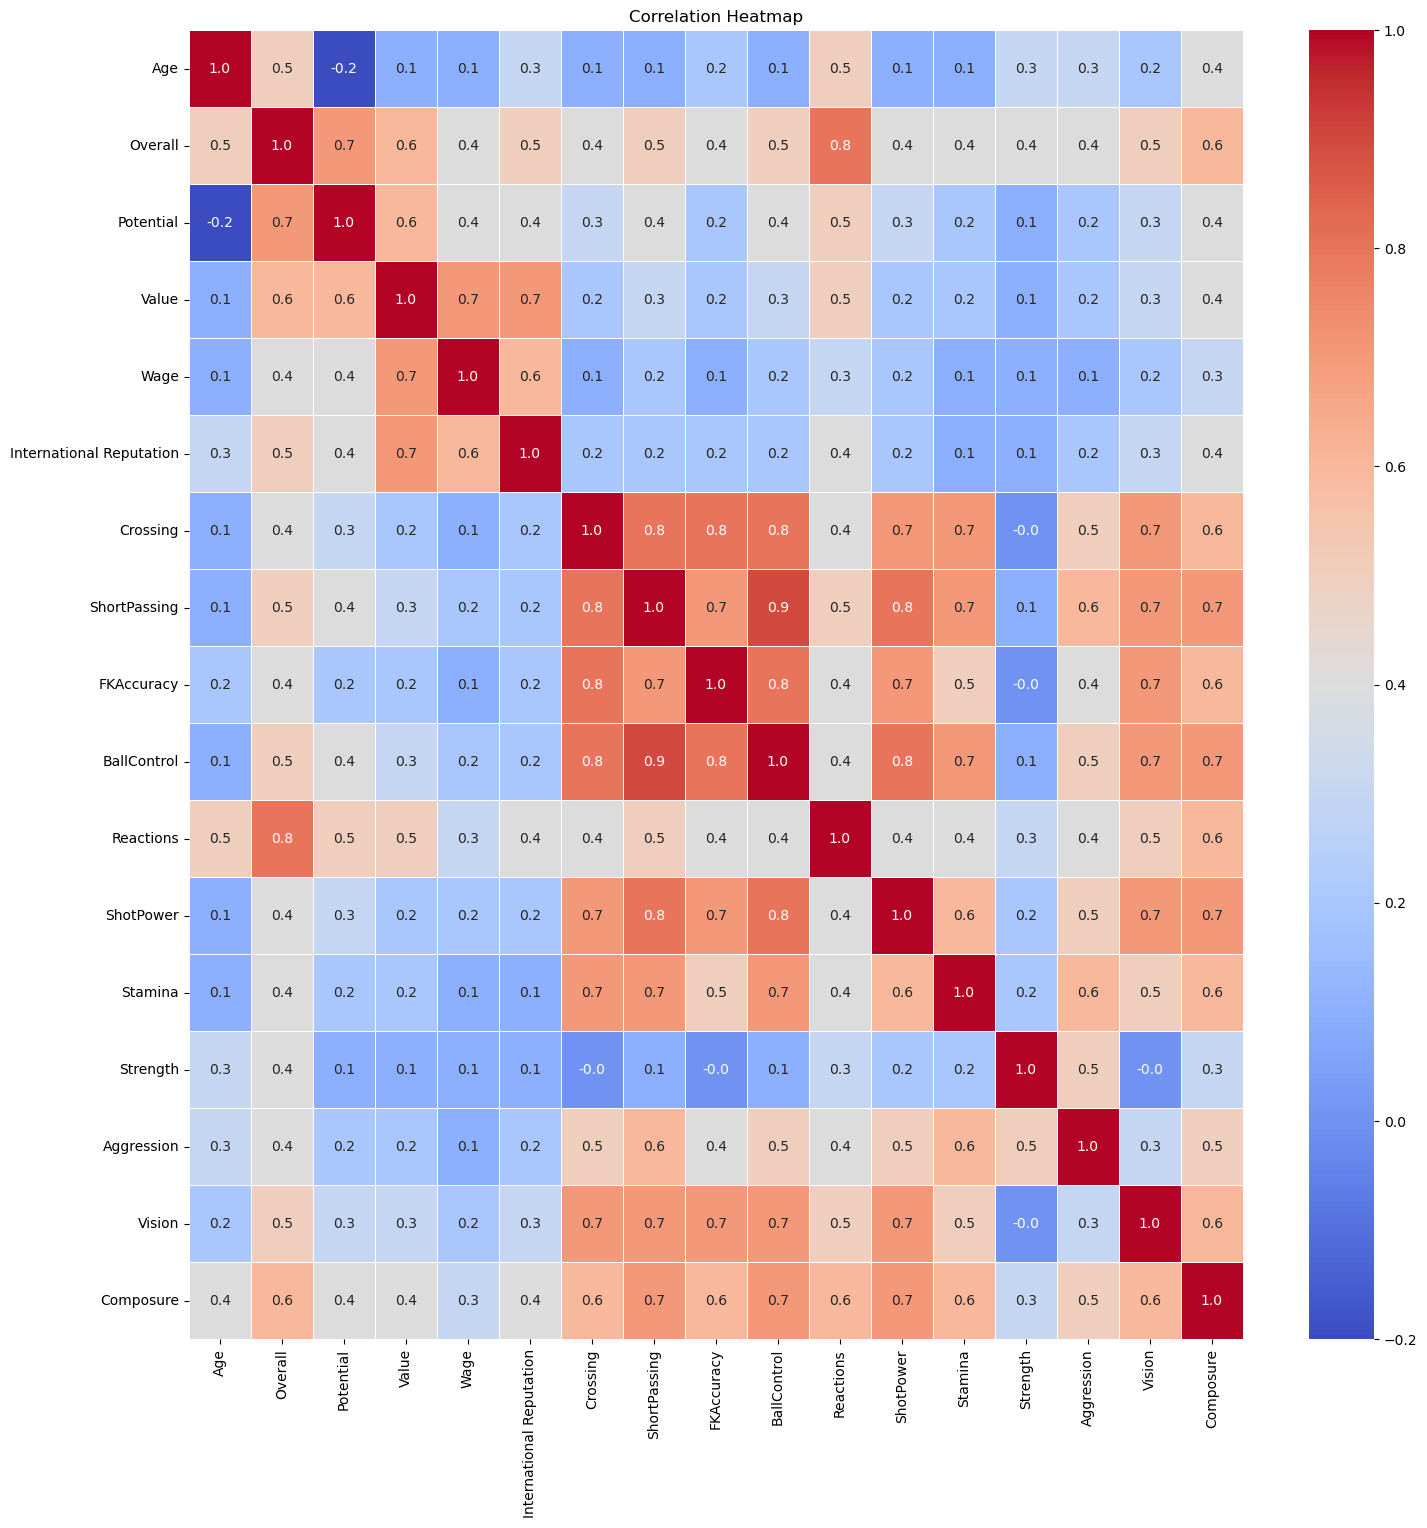

Highly correlated features with target (2):

Potential (0.7)
Reactions (0.8)

------------------------------------------------------

Moderately correlated features with target (14):

Age (0.5)
Value (0.6)
Wage (0.4)
International Reputation (0.5)
Crossing (0.4)
ShortPassing (0.5)
FKAccuracy (0.4)
BallControl (0.5)
ShotPower (0.4)
Stamina (0.4)
Strength (0.4)
Aggression (0.4)
Vision (0.5)
Composure (0.6)

------------------------------------------------------

Remainging number of columns: 6
Overall (1.0)
Preferred Foot
Work Rate
Body Type
Position
Best Position


In [340]:
corr = corr_matrix(num_df,True)

# List of features highly correlated with target('Overall')
high_corr_features = high_corr_target_features(corr)


# List of features moderately correlated with target('Overall')
mod_corr_features = mod_corr_target_features(corr)

print("\n------------------------------------------------------\n")
# Extract only the column names from the lists
columns_with_considerable_corr = [feature[0] for feature in high_corr_features + mod_corr_features]

# Iterate through all columns and print those not in the list of columns to drop
print(f"Remainging number of columns: {df.shape[1]-len(columns_with_considerable_corr)}")
for col in df.columns:
    if col not in columns_with_considerable_corr and col in num_col:
        print(f"{col} ({abs(corr.loc['Overall',col])})")
    elif col not in columns_with_considerable_corr:
        print(col)

In [341]:
high_multicollinearity_features(corr)

BallControl (0.5) & ShortPassing (0.5) - Correlation: 0.9


### Outlier Detection

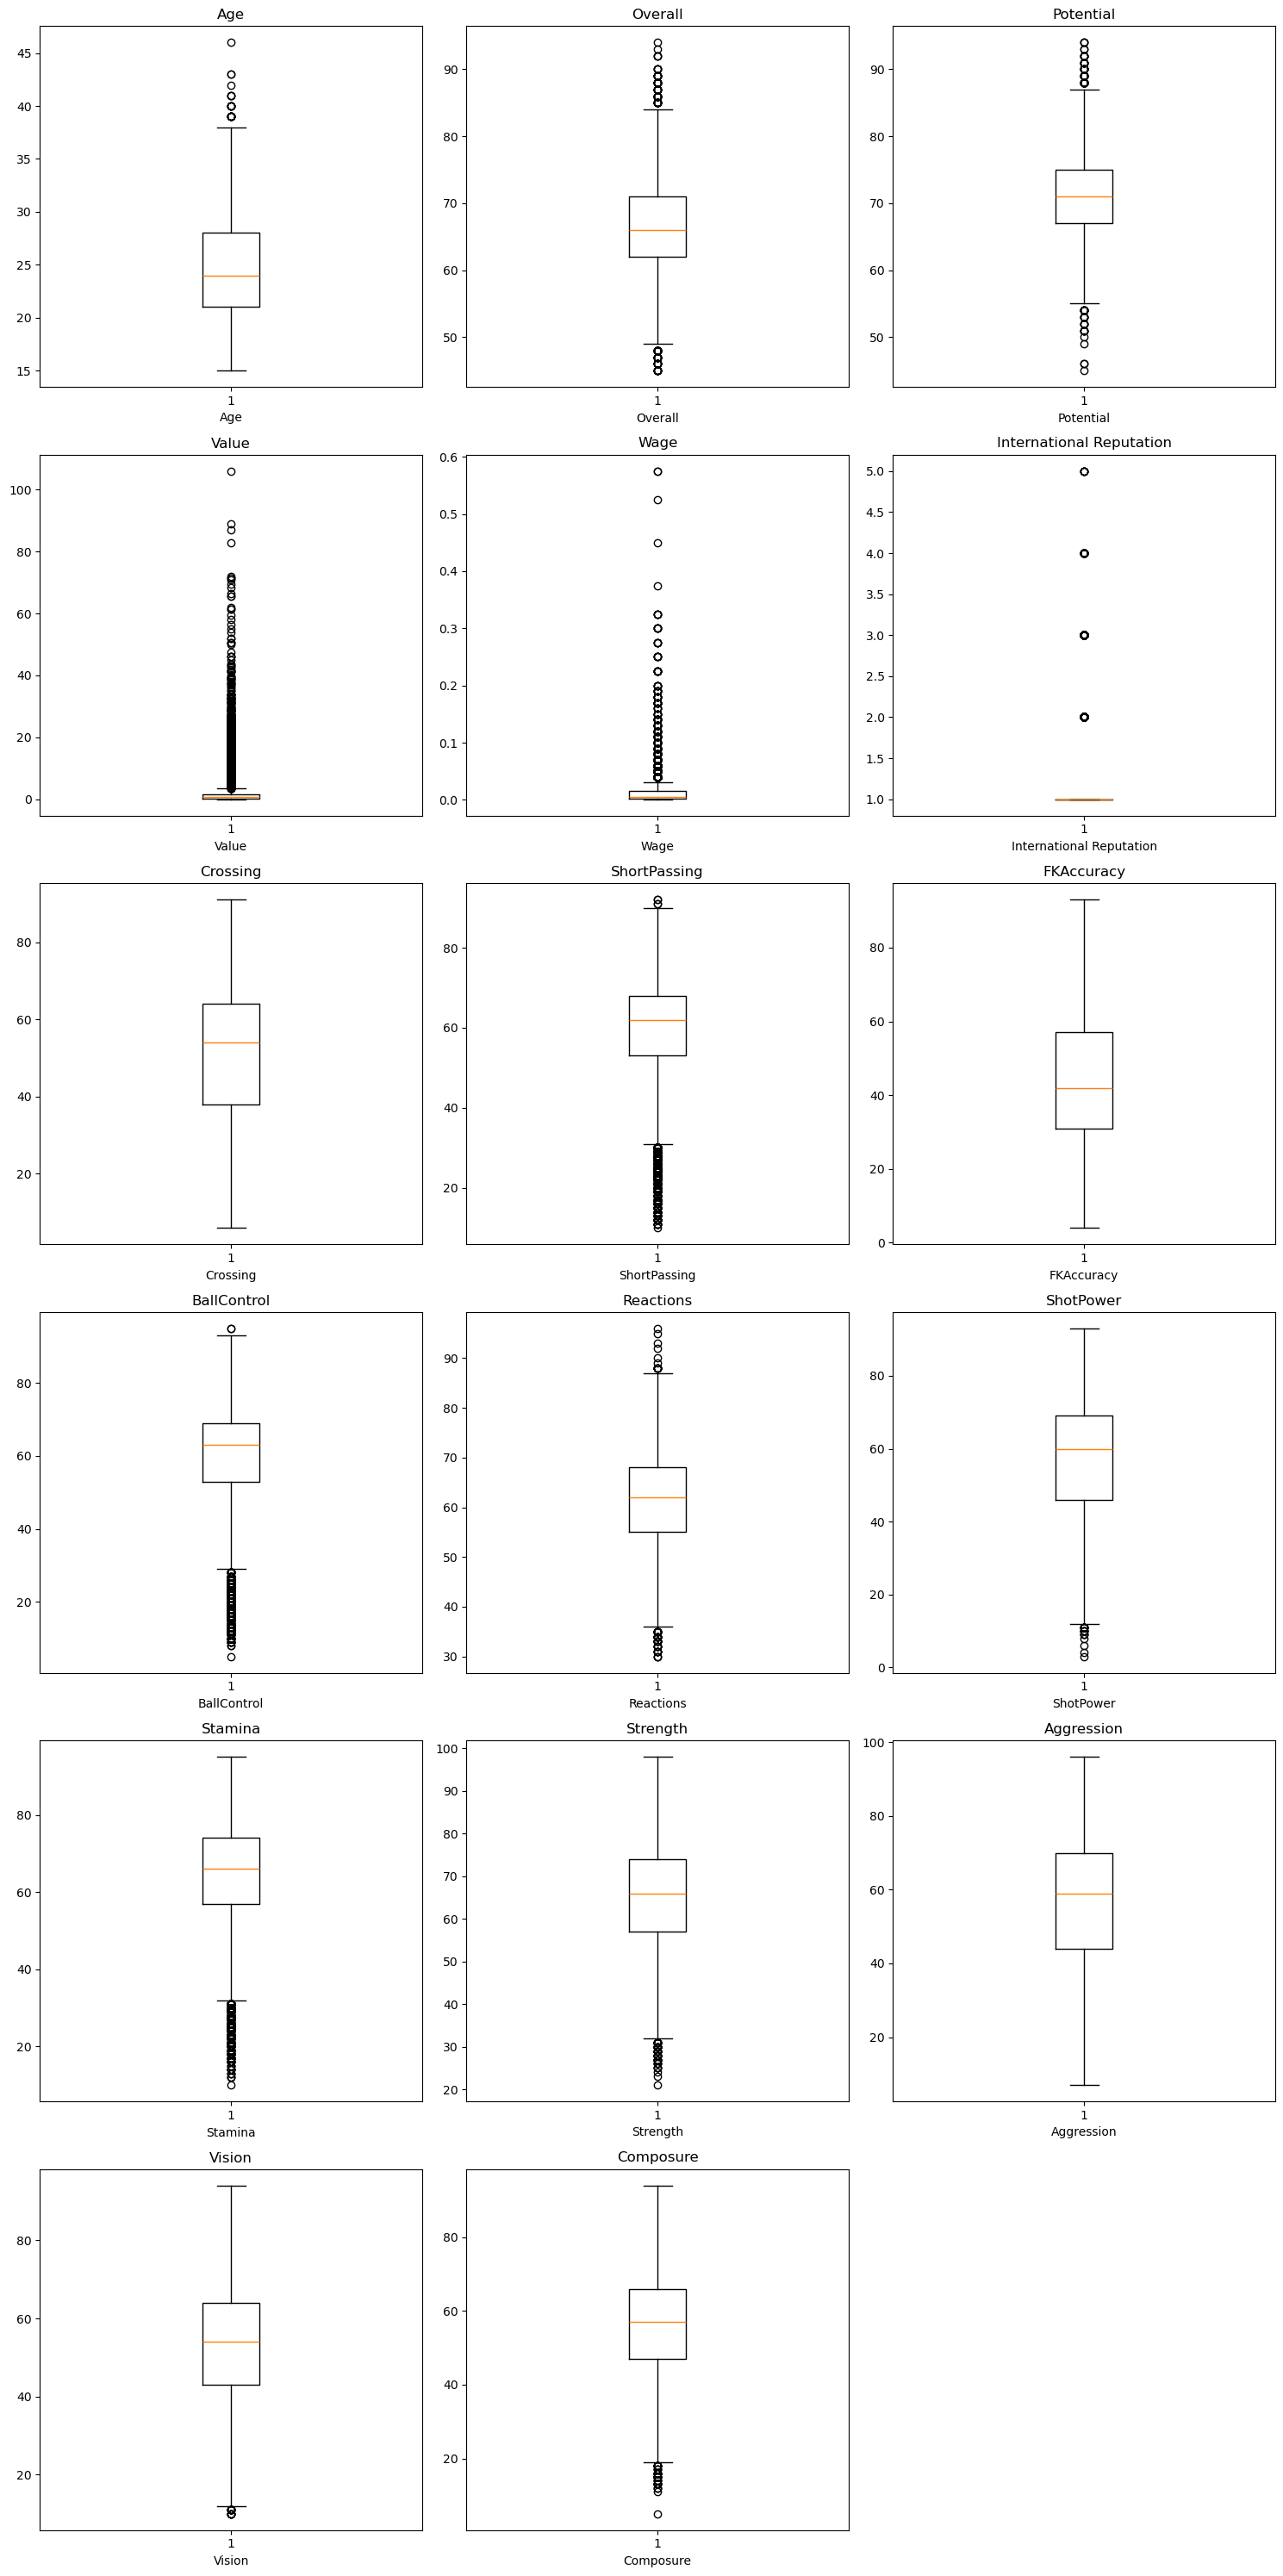

In [342]:
# Define the number of columns and rows for the subplots
n_cols = 3  # Number of subplots per row
n_rows = math.ceil(len(num_col) / n_cols)  # Calculate required number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array to easily iterate (even if multiple rows)
axes = axes.flatten()

# Plot boxplots for each column
for i, col in enumerate(num_col):
    axes[i].boxplot(num_df[col])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)

# Hide any unused subplots (if the number of columns isn't a multiple of n_cols)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Feature Engineering

### Creating New Features

In [343]:
# 3 new features
# df['Attacking_Score'] = ((df['Finishing'] + df['ShotPower']) / 2).round(2)
df['Physical_Score'] = ((df['Strength'] + df['Stamina']) / 2).round(2)

# Concatenate the new columns to num_df
num_df = pd.concat([num_df, df[["Physical_Score"]]], axis=1)
num_col = num_df.columns.tolist()

# Display the resulting dataframe with new features
df[['Physical_Score']].head(10)

Physical_Score
0            84.5
1            86.0
2            86.0
3            78.0
4            91.0
5            79.0
6            80.0
7            77.5
8            70.5
9            86.0

New Features (3)  
<!-- **BMI**: Derived from Height and Weight - Reflects physical build and fitness.  
**Contract Length**: Difference between Contract Valid Until and Joined - Indicates player value and stability.  
**Age Group**: Categorize players into bins (Young, Prime, Veteran) - Helps in understanding player lifecycle.  
**Total Passing Ability**: Sum of ShortPassing and LongPassing - Reflects overall passing ability.   -->
<!-- # df['BMI'] = (df['Weight'] / (df['Height'] ** 2)).round(2)                     # to get BMI in kg/m^2
# df['Contract_Length'] = df['Contract Valid Until'] - df['Joined']             # contract period in no. of years

# df['Total_Passing'] = df['ShortPassing'] + df['LongPassing'] 
# df['Dribbling_Control'] = ((df['Dribbling'] + df['BallControl'] + df['Agility']) / 3).round(2) 
df['Defensive_Score'] = ((df['Interceptions'] + df['Marking']) / 2).round(2)-->
<!-- **Attacking Score**: Average of Finishing, ShotPower - Represents attacking capability.   -->
<!-- **Defensive Score**: Average of Interceptions, and Marking - Measures defensive skills.   -->
**Physical Score**: Average of Strength, Stamina - Reflects physicality.  
<!-- **Dribbling Control**: Averages of Dribbling, BallControl, and Agility - Measures ball-handling and agility.   -->

In [344]:
for col in ['Physical_Score']:
    print(f"Unique values in '{col}' ({df[col].nunique()}): \n{df[col].unique()}\n")

# The body mass index (BMI) range for adults is: 
# Underweight: Below 18.5
# Healthy weight: 18.5 to 24.9
# Overweight: 25.0 to 29.9
# Obesity: 30.0 or greater


Unique values in 'Physical_Score' (130): 
[84.5 86.  78.  91.  79.  80.  77.5 70.5 77.  76.5 65.  74.5 78.5 79.5
 82.5 75.  87.  81.  75.5 85.  66.5 72.  82.  81.5 73.5 71.5 70.  74.
 83.5 76.  88.5 85.5 64.5 73.  71.  65.5 90.  69.5 84.  80.5 72.5 69.
 67.  68.  88.  66.  68.5 83.  60.  87.5 53.  61.5 92.5 62.5 86.5 59.5
 62.  67.5 63.  89.  61.  60.5 55.5 64.  59.  58.  52.5 58.5 63.5 57.5
 57.  51.5 54.5 56.5 54.  53.5 51.  50.  89.5 49.  49.5 52.  55.  56.
 48.  50.5 46.  43.  47.5 48.5 46.5 44.  33.  34.  47.  44.5 41.  37.
 42.  40.5 40.  43.5 45.5 41.5 45.  33.5 39.  32.5 42.5 39.5 31.  38.5
 35.  37.5 36.5 30.5 38.  36.  28.5 29.5 27.5 32.  35.5 34.5 31.5 30.
 28.  27.  29.  22. ]



### Dropping Columns

In [345]:
# # drop columns that have no importance to outfield player performance (16)
# num_features_to_drop = ['Jersey Number','Penalties', 'Wage', 'Joined','Contract Valid Until',
#                         'Height', 'Weight', 'Balance',
#                         'Finishing','ShotPower',
#                         'Strength','Stamina','Jumping']
# cat_features_to_drop = []

# df = df.drop(columns=num_features_to_drop+cat_features_to_drop, axis=1)
# num_df = num_df.drop(columns=num_features_to_drop, axis=1)
# num_col = num_df.columns.tolist()
# cat_df = cat_df.drop(columns=cat_features_to_drop, axis=1)
# cat_col = cat_df.columns.tolist()

Reason for dropping selected columns (16)

<!-- **ID**: *Purely a unique identifier, irrelevant for prediction.*  
**Age**:  *Created new feature*  
**Name**: *Informational only; doesn’t contribute to performance prediction.*  
**Photo**: *URL to player photo; purely visual, irrelevant for prediction.*  
**Nationality**: *Descriptive only; doesn’t directly influence gameplay.*  
**Flag**: *URL to flag image; purely visual, irrelevant for prediction.*  
**Club**: *Descriptive only; doesn’t affect individual performance.*  
**Club Logo**: *URL to club logo; purely visual, irrelevant for prediction.*  
**Real Face**: *Indicates whether the player’s face is realistically rendered; irrelevant for gameplay.*   -->
**Jersey Number**: *Purely informational; no impact on gameplay.*  
**Joined**: *Date the player joined the club; irrelevant for predicting performance.*  
<!-- **Loaned From**: *Describes loan status; irrelevant for player performance.*   -->
**Contract Valid Until**: *Contract expiry date; administrative detail, irrelevant for performance prediction.*  
**Height**: *Already reflected in Jumping and Strength.*  
**Weight**: *Already reflected in Body Type.*  
<!-- **Volleys**: *Only moderate correlation (0.4) with Overall and minimal contribution to overall performance.*  
**Curve**: *Only moderate correlation (0.4) with Overall and less important compared to Dribbling and Crossing.*  
**FKAccuracy**: *Specialized skill, only moderate correlation (0.4) with Overall.*   -->
**Penalties**: *Situational skill, only moderate correlation (0.3) with Overall.*  
**Finishing + ShotPower**: *Created new feature*  
**StandingTackle + Interceptions + Marking**: *Created new feature*  
**Strength + Stamina + Jumping**: *Created new feature*  
<!-- **Dribbling + BallControl + Agility**: *Created new feature*   -->
<!-- **GKDiving**: *Goalkeeper-specific skill; to be used separately for goalkeeper model.*  
**GKHandling**: *Goalkeeper-specific skill; to be used separately for goalkeeper model.*  
**GKKicking**: *Goalkeeper-specific skill; to be used separately for goalkeeper model.*  
**GKPositioning**: *Goalkeeper-specific skill; to be used separately for goalkeeper model.*  
**GKReflexes**: *Goalkeeper-specific skill; to be used separately for goalkeeper model.* -->

Reason for keeping selected columns (33)

**Overall (Target Value)**: *The player’s overall rating based on various attributes.*  
**Potential**: *The player’s potential rating, which indicates their peak performance.*  
**Value**: *The player’s estimated market value.*  
**Wage**: *The player’s weekly wage.*  
**Special**: *A special rating based on how unique or outstanding the player’s skills are.*  
**Preferred Foot**: *Whether the player prefers their left or right foot.*  
**International Reputation**: *A score indicating the player’s international reputation (higher means more well-known globally).*  
**Weak Foot**: *The player’s skill level with their non-dominant foot.*  
**Skill Moves**: *The player’s proficiency with skill moves (rated out of 5 stars).*  
**Work Rate**: *The player’s work rate in both attack and defense (e.g., “High/Medium”).*  
**Body Type**: *The player’s physical build (e.g., lean, normal, stocky).*  
**Position**: *The player’s primary playing position (e.g., ST, CM).*  
**Crossing**: *The player’s ability to deliver accurate crosses.*  
**HeadingAccuracy**: *The player’s accuracy with headers.*  
**Acceleration**: *How quickly the player can reach top speed.*  
**SprintSpeed**: *The player’s top running speed.*  
**Agility**: *How quickly the player can change direction.*  
**Reactions**: *The player’s reaction time to in-game events.*  
**Balance**: *The player’s ability to maintain balance, especially in duels or when dribbling.*  
**Aggression**: *The player’s intensity in challenging for the ball.*  
**Positioning**: *The player’s ability to position themselves well on the field.*  
**Vision**: *The player’s awareness of their teammates’ positions.*  
**Composure**: *The player’s ability to remain calm under pressure.*  
**Best Position**: *The player’s best-suited position on the field.*  
**Best Overall Rating**: *The player’s highest rating based on different positions.*  
**BMI**: *Derived from Height and Weight*  
**Contract Length**: *Difference between Contract Valid Until and Joined*  
**Age Group**: *Categorize players into bins (Young, Prime, Veteran)*  
**Total Passing Ability**: *Sum of ShortPassing and LongPassing*  
**Attacking Score**: *Average of Finishing, ShotPower, and LongShots*   
**Defensive Score**: *Average of StandingTackle, SlidingTackle, Interceptions, and Marking*   
**Physical Score**: *Average of Strength, Stamina, and Jumping - Reflects physicality.*  
**Dribbling Control**: *Averages of Dribbling, BallControl, and Agility.*  

#### Duplicate Values

##### Rows

In [346]:
df.duplicated().sum()

0

##### Columns

In [347]:
df.columns.duplicated().sum()

0

### Splitting data into numerical and categorical columns

In [348]:
num_df = df.select_dtypes(include='number')
num_col = num_df.columns.tolist()
print(num_col)

['Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 'Crossing', 'ShortPassing', 'FKAccuracy', 'BallControl', 'Reactions', 'ShotPower', 'Stamina', 'Strength', 'Aggression', 'Vision', 'Composure', 'Physical_Score']


In [349]:
cat_df = df.select_dtypes(include='object')
cat_col = cat_df.columns.tolist()
print(cat_col)

['Preferred Foot', 'Work Rate', 'Body Type', 'Position', 'Best Position']


### Unique values in categorical columns

In [350]:
for col in cat_col:
    print(f"Unique values in '{col}' ({df[col].nunique()}): \n{df[col].unique()}\n")

Unique values in 'Preferred Foot' (2): 
['Right' 'Left']

Unique values in 'Work Rate' (9): 
['High/ Medium' 'High/ High' 'High/ Low' 'Medium/ Medium' 'Medium/ High'
 'Low/ Medium' 'Medium/ Low' 'Low/ High' 'Low/ Low']

Unique values in 'Body Type' (16): 
['Normal (170-185)' 'Stocky (170-185)' 'Lean (170-185)' 'Lean (185+)'
 'Normal (170-)' 'C. Ronaldo' 'Normal (185+)' 'Messi' 'Stocky (170-)'
 'Lean (170-)' 'Shaqiri' 'Neymar' 'Normal (190+)' 'Stocky (185+)'
 'Courtois' 'Akinfenwa']

Unique values in 'Position' (29): 
['ST' 'LF' 'LDM' 'LB' 'RW' 'SUB' 'RCM' 'LW' 'RB' 'RDM' 'RES' 'LCM' 'CDM'
 'LM' 'CAM' 'RM' 'RS' 'LCB' 'RCB' 'CB' 'CM' 'LS' 'RF' 'LWB' 'RAM' 'RWB'
 'LAM' 'CF' 'GK']

Unique values in 'Best Position' (15): 
['ST' 'CDM' 'LB' 'CAM' 'RB' 'LWB' 'CM' 'RWB' 'RM' 'LM' 'CB' 'LW' 'CF' 'RW'
 'GK']



**There are some incorrect values in 'Body Type' column**

In [351]:
# List of known incorrect values
incorrect_values = ['C. Ronaldo', 'Messi', 'Shaqiri', 'Neymar', 'Courtois', 'Akinfenwa']

# Filter and display rows with incorrect values in the 'Body Type' column
incorrect_records = df[df['Body Type'].isin(incorrect_values)]
incorrect_records

Age  Overall  Potential   Value   Wage Preferred Foot  \
9       31       94         94   87.00  0.575          Right   
58      29       93         93   89.00  0.575           Left   
120     24       82         85   25.00  0.080           Left   
168     24       92         94  106.00  0.450          Right   
15266   24       89         92   65.50  0.170           Left   
10997   34       64         64    0.23  0.007          Right   

       International Reputation       Work Rate   Body Type Position  \
9                           5.0       High/ Low  C. Ronaldo       LW   
58                          5.0  Medium/ Medium       Messi       RW   
120                         3.0    High/ Medium     Shaqiri       RM   
168                         5.0    High/ Medium      Neymar       LW   
15266                       4.0  Medium/ Medium    Courtois       GK   
10997                       1.0        Low/ Low   Akinfenwa       ST   

       Crossing  ShortPassing  FKAccuracy  BallControl  Reactions  ShotPower  \
9          84.0          83.0        76.0         93.0       96.0       92.0   
58         77.0          88.0        90.0         95.0       95.0       85.0   
120        74.0          80.0        78.0         83.0       79.0       84.0   
168        75.0          81.0        84.0         95.0       88.0       78.0   
15266      14.0          32.0        11.0         23.0       81.0       36.0   
10997      39.0          56.0        42.0         69.0       61.0       60.0   

       Stamina  Strength  Aggression  Vision  Composure Best Position  \
9         92.0      80.0        63.0    85.0       86.0            ST   
58        74.0      59.0        48.0    90.0       94.0           CAM   
120       78.0      73.0        64.0    79.0       79.0           CAM   
168       79.0      53.0        56.0    80.0       80.0            LW   
15266     38.0      70.0        23.0    44.0       52.0            GK   
10997     63.0      98.0        63.0    62.0       70.0            ST   

       Physical_Score  
9                86.0  
58               66.5  
120              75.5  
168              66.0  
15266            54.0  
10997            80.5

#### Replace incorrect values with mode

In [352]:
most_common_body_type = df['Body Type'].mode()[0]

df['Body Type'] = df['Body Type'].replace(incorrect_values, most_common_body_type)

print(f"Unique values in 'Body Type' ({df['Body Type'].nunique()}): \n{df['Body Type'].unique()}\n")

Unique values in 'Body Type' (10): 
['Normal (170-185)' 'Stocky (170-185)' 'Lean (170-185)' 'Lean (185+)'
 'Normal (170-)' 'Normal (185+)' 'Stocky (170-)' 'Lean (170-)'
 'Normal (190+)' 'Stocky (185+)']



# Exploratory Data Analysis (EDA)

### Correlation Matrix

In [353]:
# plt.figure(figsize=(50, 50))
# sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt='0.1f', linewidth=0.5)
# plt.savefig('correlation_heatmap_post_drop.png', dpi=300, bbox_inches='tight')
# plt.title("Correlation Heatmap")
# plt.show()

In [354]:
# num_df.corr().round(1).to_csv("corr_post_drop.csv")

## Univariate Analysis
understanding the distribution and properties of individual variables.

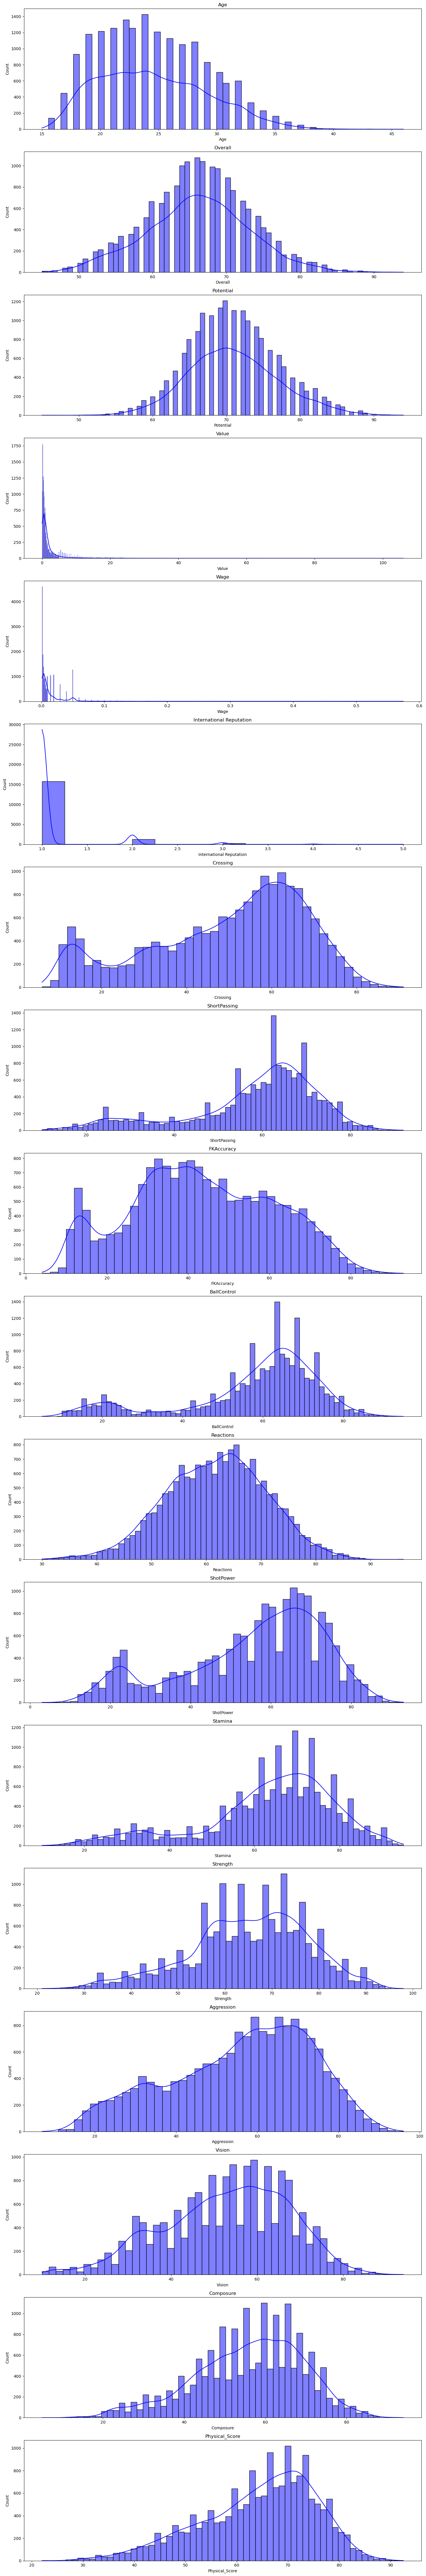

In [355]:
# Define the number of columns and rows for the subplots
n_cols = 1  # Number of subplots per row
n_rows = math.ceil(len(num_col) / n_cols)  # Calculate required number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array to easily iterate (even if multiple rows)
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(num_col):
    sns.histplot(num_df[col], kde=True, ax=axes[i], color='blue', edgecolor='black')  # Pass the data for each column
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)

# Hide any unused subplots (if the number of columns isn't a multiple of n_cols)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## Bivariate Analysis
Relationship between an independent variable and the target variable

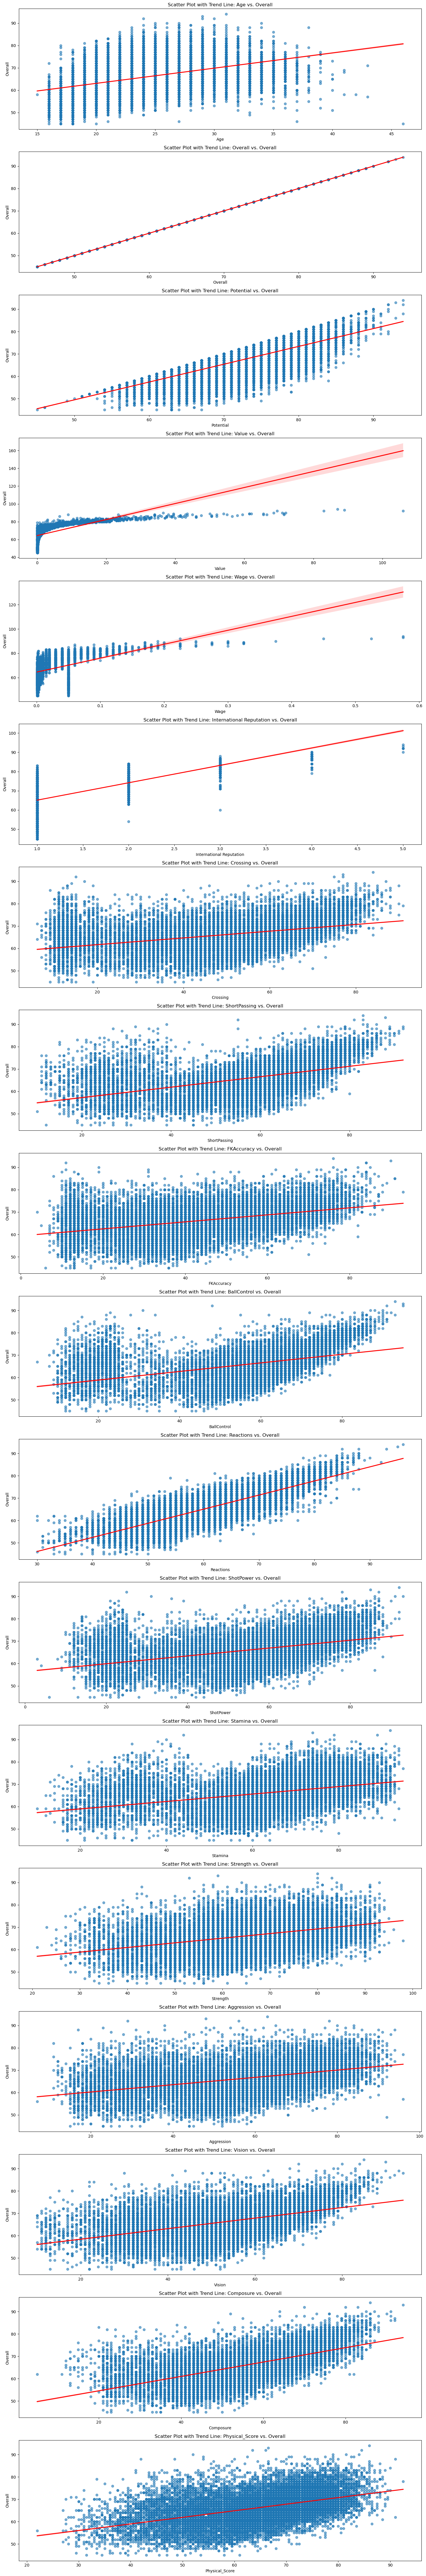

In [356]:
# Define the number of columns and rows for the subplots
n_cols = 1  # Number of subplots per row
n_rows = math.ceil(len(num_col) / n_cols)  # Calculate required number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Plot scatter plots with regression lines for each numerical feature against 'Overall'
for i, col in enumerate(num_col):
    sns.regplot(x=num_df[col], y=df['Overall'], ax=axes[i], scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
    axes[i].set_title(f"Scatter Plot with Trend Line: {col} vs. Overall")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Overall')

# Hide any unused subplots (if the number of columns isn't a multiple of n_cols)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## Multivariate Analysis

In [357]:
# # features with moderate-high correlation with 'Overall'
# selected_features = ['Potential','Reactions', 'Composure','Vision',
#                      'Aggression','HeadingAccuracy', 'International Reputation', 
#                      'Value',
#                      'Attacking_Score', 
#                      'Physical_Score',
#                      'Overall']
# sns.pairplot(df[selected_features], kind='scatter', diag_kind='kde')
# plt.show()

# Encoding
Convert categorical columns to numerical (e.g., using label encoding or one-hot encoding).

In [358]:
# Columns for encoding
# label_encode_cols = ['Preferred Foot', 'Body Type']
# one_hot_encode_cols = ['Work Rate']
target_encode_cols = ['Work Rate','Preferred Foot', 'Body Type','Position', 'Best Position']

# Apply Label Encoding
# label_encoders = {}  # To store encoders for inverse transformation if needed
# for col in label_encode_cols:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

# # # Apply One-Hot Encoding
# df_encoded = pd.get_dummies(df['Work Rate'], columns=one_hot_encode_cols, dtype='int', drop_first=True)
# one_hot_feature_list = df_encoded.columns.tolist()  # Feature list after one-hot encoding

# # Concatenate the original DataFrame with the one-hot encoded columns
# # Drop the 'Work Rate' column
# df = df.drop('Work Rate', axis=1)
# df = pd.concat([df, df_encoded], axis=1)

# Apply target encoding
target_encoding_mappings = {}  # Dictionary to store target encoding mappings
for col in target_encode_cols:
    target_means = df.groupby(col)['Overall'].mean()
    df[col] = df[col].map(target_means)
    target_encoding_mappings[col] = target_means.to_dict()


# Concatenate the new columns to num_df
num_df = pd.concat([num_df, df[['Work Rate','Preferred Foot', 'Body Type','Position', 'Best Position']]], axis=1)
num_col = num_df.columns.tolist()

# Display the first few rows of the encoded dataframe
df.head()

Age  Overall  Potential  Value   Wage  Preferred Foot  \
0   29       92         92   83.0  0.525       66.005499   
1   28       86         86   37.5  0.130       66.005499   
2   29       87         87   41.5  0.180       66.005499   
3   24       86         89   41.5  0.140       66.597872   
4   23       88         94   71.5  0.225       66.005499   

   International Reputation  Work Rate  Body Type   Position  Crossing  \
0                       5.0  68.220522  66.302617  71.217494      77.0   
1                       3.0  70.159033  67.306250  70.500000      73.0   
2                       4.0  70.159033  66.302617  69.697417      76.0   
3                       4.0  68.220522  65.044269  68.196364      82.0   
4                       4.0  68.220522  66.053435  69.697417      78.0   

   ShortPassing  FKAccuracy  BallControl  Reactions  ShotPower  Stamina  \
0          83.0        84.0         91.0       93.0       87.0     89.0   
1          84.0        68.0         85.0       87.0       84.0     94.0   
2          84.0        68.0         83.0       89.0       84.0     93.0   
3          83.0        83.0         83.0       84.0       83.0     87.0   
4          85.0        82.0         90.0       86.0       90.0     91.0   

   Strength  Aggression  Vision  Composure  Best Position  Physical_Score  
0      80.0        78.0    84.0       83.0      65.902106            84.5  
1      78.0        88.0    76.0       85.0      67.330935            86.0  
2      79.0        91.0    80.0       86.0      67.330935            86.0  
3      69.0        69.0    78.0       79.0      65.154450            78.0  
4      91.0        72.0    87.0       83.0      67.176354            91.0

In [359]:
df.dtypes

Age                           int64
Overall                       int64
Potential                     int64
Value                       float64
Wage                        float64
Preferred Foot              float64
International Reputation    float64
Work Rate                   float64
Body Type                   float64
Position                    float64
Crossing                    float64
ShortPassing                float64
FKAccuracy                  float64
BallControl                 float64
Reactions                   float64
ShotPower                   float64
Stamina                     float64
Strength                    float64
Aggression                  float64
Vision                      float64
Composure                   float64
Best Position               float64
Physical_Score              float64
dtype: object

In [360]:
# # Pickling the label encoders
# pickle_path = 'label_encoders.pkl'
# with open(pickle_path, 'wb') as file:
#     pickle.dump(label_encoders, file)
# print("Label encoders have been saved.")

# # Pickle the one-hot feature list
# with open('one_hot_feature_list.pkl', 'wb') as file:
#     pickle.dump(one_hot_feature_list, file)
# print("Feature list has been saved.")

# Pickle target encoding mappings
with open('target_encoding_mappings.pkl', 'wb') as file:
    pickle.dump(target_encoding_mappings, file)
print("Target encoding mappings have been saved.")

Target encoding mappings have been saved.


In [361]:
# # Load the label encoders
# with open('label_encoders.pkl', 'rb') as file:
#     label_encoders = pickle.load(file)

# # Load the one-hot encoded feature list
# with open('one_hot_feature_list.pkl', 'rb') as file:
#     one_hot_feature_list = pickle.load(file)

# Load the target encoding mappings
with open('target_encoding_mappings.pkl', 'rb') as file:
    target_encoding_mappings = pickle.load(file)

# print("label encoders:")
# print(label_encoders)

# print("\none-hot encoded feature list:")
# print(one_hot_feature_list)

print("\ntarget encoding mappings:")
print(target_encoding_mappings)


target encoding mappings:
{'Work Rate': {'High/ High': 70.15903307888041, 'High/ Low': 67.24853801169591, 'High/ Medium': 68.22052173913043, 'Low/ High': 67.175, 'Low/ Low': 65.76666666666667, 'Low/ Medium': 65.84807256235828, 'Medium/ High': 68.0340760157274, 'Medium/ Low': 67.46823529411765, 'Medium/ Medium': 64.67702632937532}, 'Preferred Foot': {'Left': 66.59787181390745, 'Right': 66.00549864416993}, 'Body Type': {'Lean (170-)': 64.6029411764706, 'Lean (170-185)': 65.04426877470355, 'Lean (185+)': 66.05343511450381, 'Normal (170-)': 66.78491171749599, 'Normal (170-185)': 66.30261660978384, 'Normal (185+)': 66.75929102344196, 'Normal (190+)': 72.0, 'Stocky (170-)': 67.44444444444444, 'Stocky (170-185)': 67.30625, 'Stocky (185+)': 67.49867374005305}, 'Position': {'CAM': 70.61467889908256, 'CB': 69.56962025316456, 'CDM': 70.52727272727273, 'CF': 69.0, 'CM': 68.2063492063492, 'GK': 69.69854132901135, 'LAM': 71.0625, 'LB': 68.19636363636364, 'LCB': 69.29534510433386, 'LCM': 68.83142857

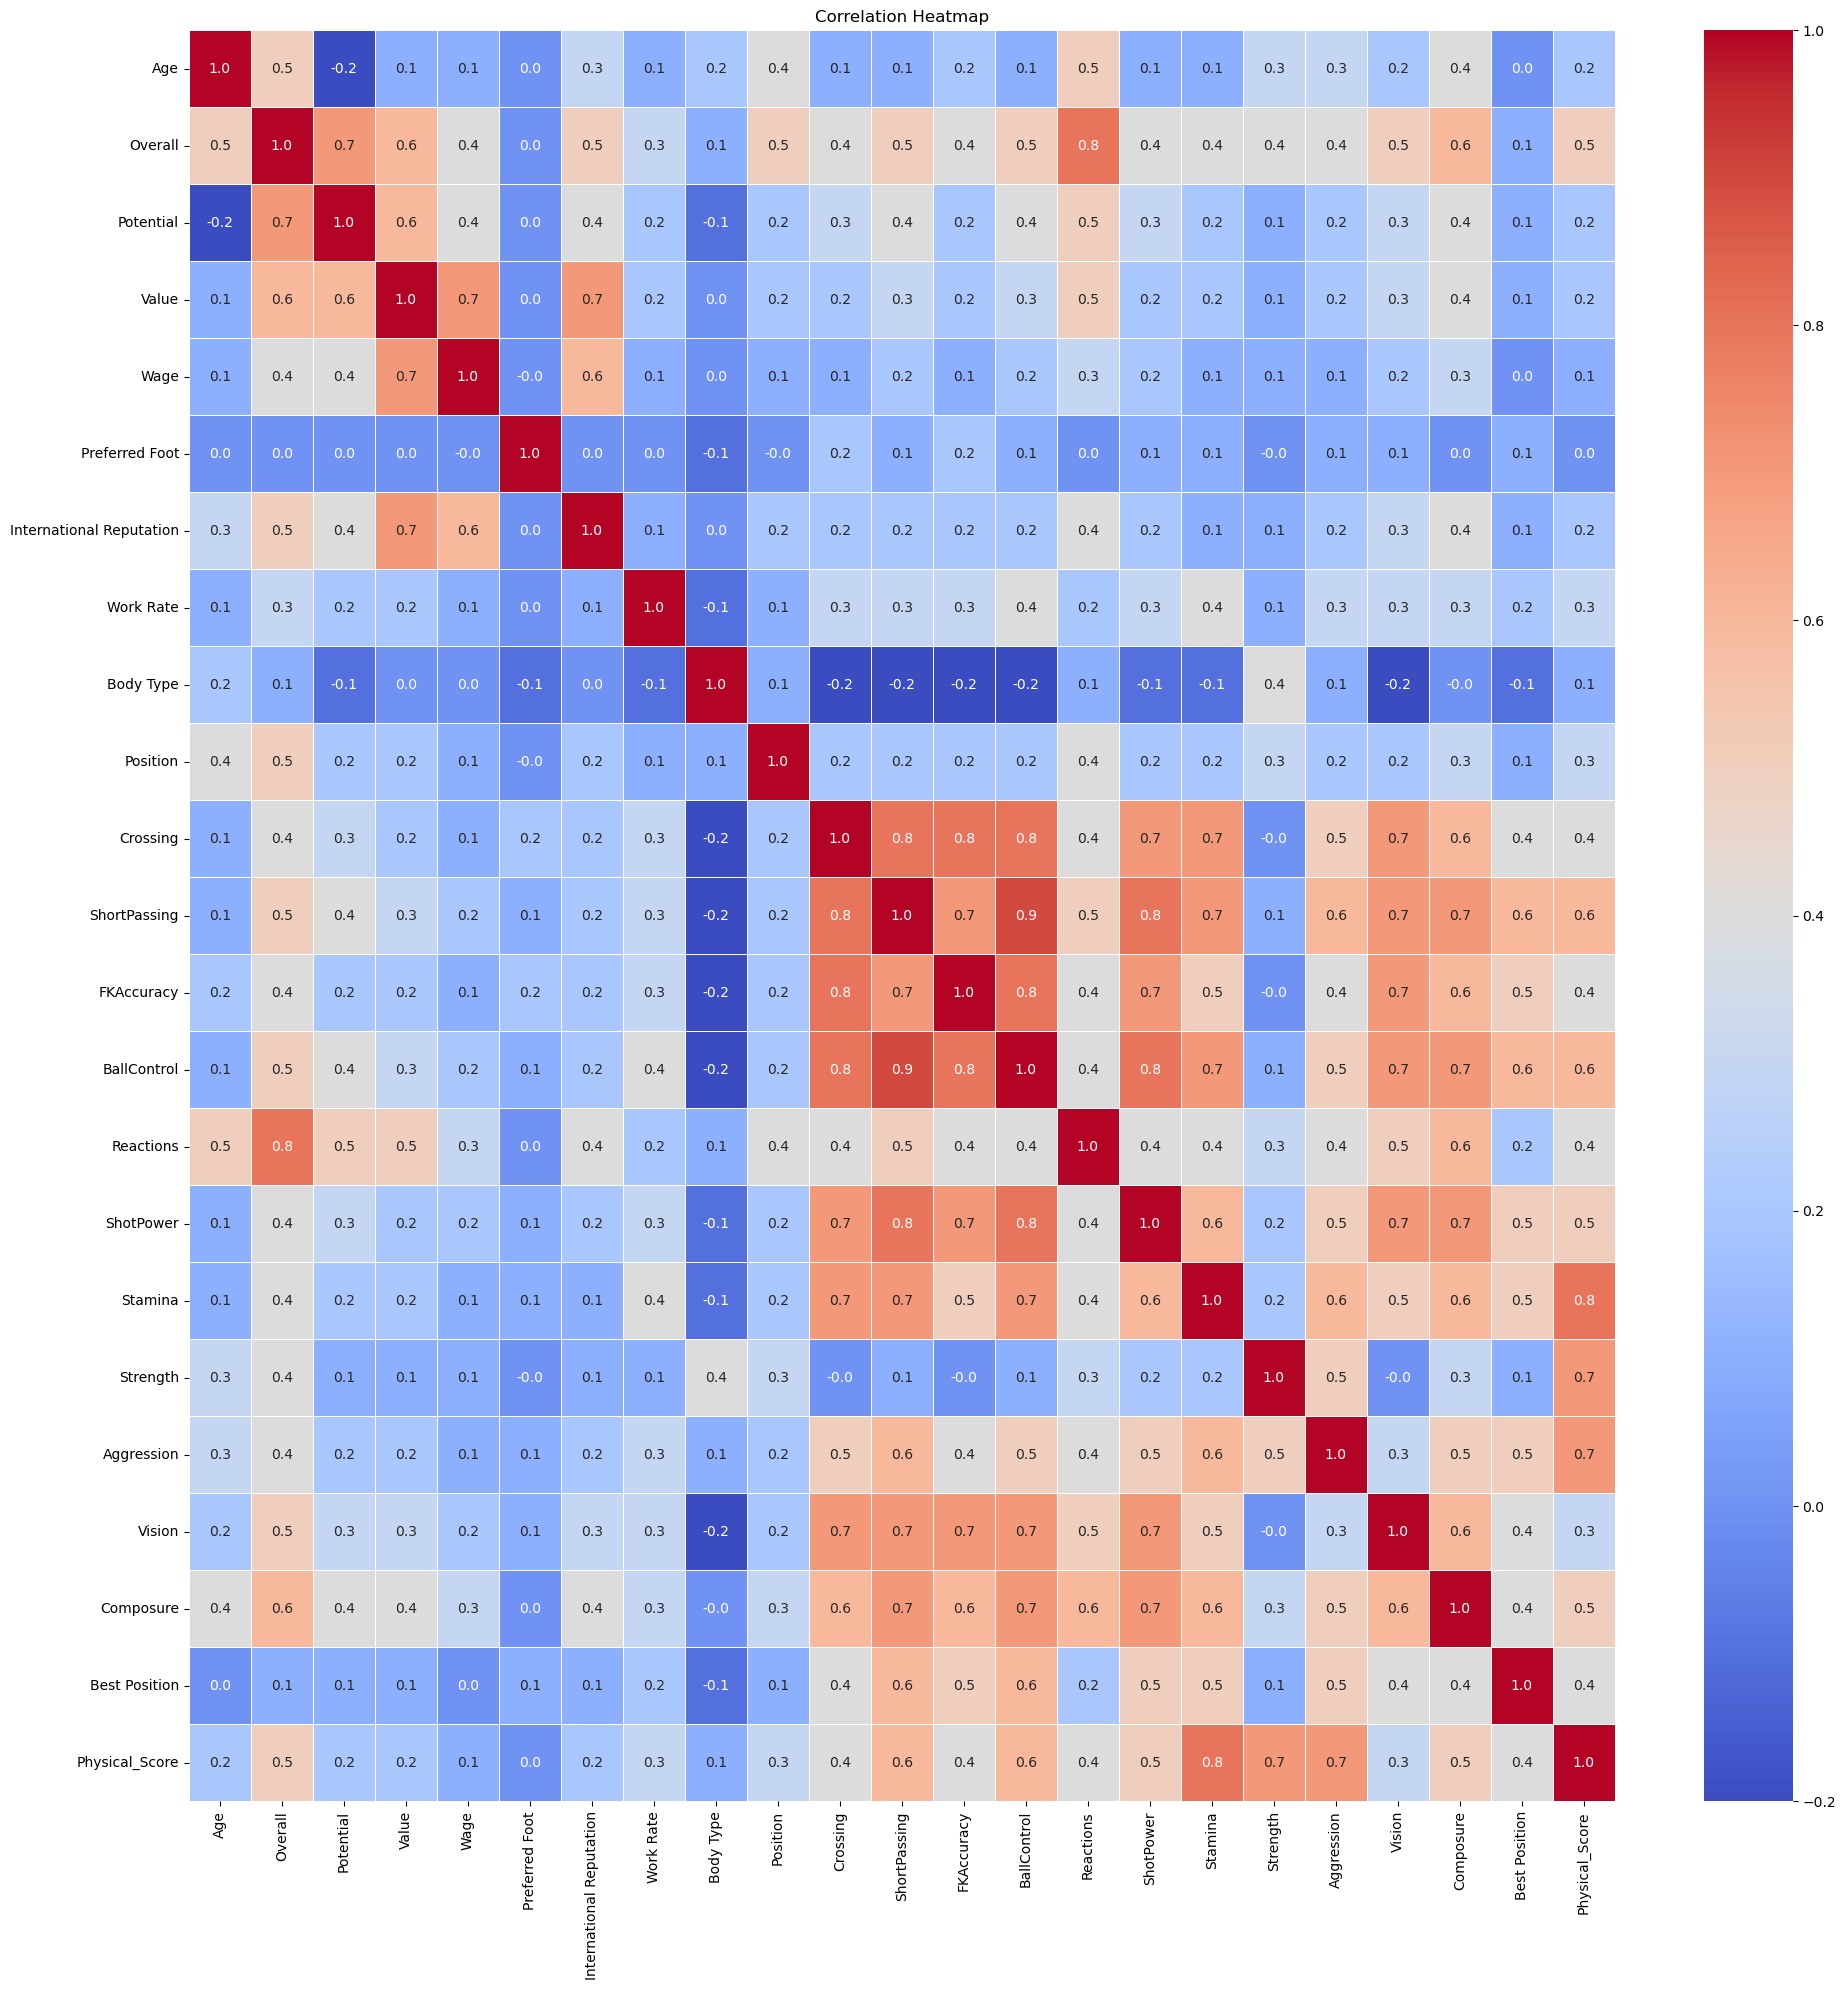

Highly correlated features with target (2):

Potential (0.7)
Reactions (0.8)

------------------------------------------------------

Moderately correlated features with target (16):

Age (0.5)
Value (0.6)
Wage (0.4)
International Reputation (0.5)
Position (0.5)
Crossing (0.4)
ShortPassing (0.5)
FKAccuracy (0.4)
BallControl (0.5)
ShotPower (0.4)
Stamina (0.4)
Strength (0.4)
Aggression (0.4)
Vision (0.5)
Composure (0.6)
Physical_Score (0.5)

------------------------------------------------------

Remainging number of columns: 5
Overall (1.0)
Preferred Foot (0.0)
Work Rate (0.3)
Body Type (0.1)
Best Position (0.1)


In [362]:
corr = corr_matrix(df,True)

# List of features highly correlated with target('Overall')
high_corr_features = high_corr_target_features(corr)


# List of features moderately correlated with target('Overall')
mod_corr_features = mod_corr_target_features(corr)

print("\n------------------------------------------------------\n")
# Extract only the column names from the lists
columns_with_considerable_corr = [feature[0] for feature in high_corr_features + mod_corr_features]

# Iterate through all columns and print those not in the list of columns to drop
print(f"Remainging number of columns: {df.shape[1]-len(columns_with_considerable_corr)}")
for col in df.columns:
    if col not in columns_with_considerable_corr:
        print(f"{col} ({abs(corr.loc['Overall',col])})")

# Splitting data into train and test datasets

In [363]:
y = df['Overall']
X = df.drop('Overall', axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
Scale numerical features using Standard scaling.

In [364]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training set only
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the fitted scaler
X_test_scaled = scaler.transform(X_test)

In [365]:
# Pickle the scaler for future use
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Scaling complete and scaler has been saved.")

Scaling complete and scaler has been saved.


In [366]:
df.head()

Age  Overall  Potential  Value   Wage  Preferred Foot  \
0   29       92         92   83.0  0.525       66.005499   
1   28       86         86   37.5  0.130       66.005499   
2   29       87         87   41.5  0.180       66.005499   
3   24       86         89   41.5  0.140       66.597872   
4   23       88         94   71.5  0.225       66.005499   

   International Reputation  Work Rate  Body Type   Position  Crossing  \
0                       5.0  68.220522  66.302617  71.217494      77.0   
1                       3.0  70.159033  67.306250  70.500000      73.0   
2                       4.0  70.159033  66.302617  69.697417      76.0   
3                       4.0  68.220522  65.044269  68.196364      82.0   
4                       4.0  68.220522  66.053435  69.697417      78.0   

   ShortPassing  FKAccuracy  BallControl  Reactions  ShotPower  Stamina  \
0          83.0        84.0         91.0       93.0       87.0     89.0   
1          84.0        68.0         85.0       87.0       84.0     94.0   
2          84.0        68.0         83.0       89.0       84.0     93.0   
3          83.0        83.0         83.0       84.0       83.0     87.0   
4          85.0        82.0         90.0       86.0       90.0     91.0   

   Strength  Aggression  Vision  Composure  Best Position  Physical_Score  
0      80.0        78.0    84.0       83.0      65.902106            84.5  
1      78.0        88.0    76.0       85.0      67.330935            86.0  
2      79.0        91.0    80.0       86.0      67.330935            86.0  
3      69.0        69.0    78.0       79.0      65.154450            78.0  
4      91.0        72.0    87.0       83.0      67.176354            91.0

In [367]:
X_train.describe()

Age     Potential         Value          Wage  Preferred Foot  \
count  13853.000000  13853.000000  13853.000000  13853.000000    13853.000000   
mean      24.523569     70.950552      1.909863      0.013916       66.144088   
std        4.649415      6.134155      4.393264      0.022943        0.250787   
min       15.000000     45.000000      0.000000      0.001000       66.005499   
25%       21.000000     67.000000      0.300000      0.002000       66.005499   
50%       24.000000     71.000000      0.650000      0.005000       66.005499   
75%       28.000000     75.000000      1.600000      0.015000       66.005499   
max       46.000000     94.000000    106.000000      0.575000       66.597872   

       International Reputation     Work Rate     Body Type      Position  \
count              13853.000000  13853.000000  13853.000000  13853.000000   
mean                   1.108424     66.133244     66.142980     66.123773   
std                    0.375885      1.764208      0.725305      3.252676   
min                    1.000000     64.677026     64.602941     60.251456   
25%                    1.000000     64.677026     66.053435     65.486576   
50%                    1.000000     64.677026     66.302617     65.486576   
75%                    1.000000     68.034076     66.759291     68.961905   
max                    5.000000     70.159033     72.000000     73.200000   

           Crossing  ShortPassing    FKAccuracy   BallControl     Reactions  \
count  13853.000000  13853.000000  13853.000000  13853.000000  13853.000000   
mean      49.763661     58.196131     43.343536     57.986068     61.653505   
std       18.390603     14.818466     17.593335     16.752897      9.241782   
min        6.000000     10.000000      4.000000      5.000000     30.000000   
25%       38.000000     53.000000     31.000000     53.000000     55.000000   
50%       54.000000     62.000000     42.000000     62.000000     62.000000   
75%       64.000000     68.000000     57.000000     69.000000     68.000000   
max       91.000000     92.000000     93.000000     95.000000     96.000000   

          ShotPower       Stamina      Strength    Aggression        Vision  \
count  13853.000000  13853.000000  13853.000000  13853.000000  13853.000000   
mean      55.578358     63.380062     65.094564     55.957987     52.728001   
std       17.462538     15.575906     12.516308     17.494109     14.419695   
min        3.000000     10.000000     21.000000      7.000000     10.000000   
25%       46.000000     56.000000     57.000000     44.000000     43.000000   
50%       59.000000     66.000000     66.000000     59.000000     54.000000   
75%       69.000000     74.000000     74.000000     70.000000     64.000000   
max       93.000000     95.000000     98.000000     96.000000     94.000000   

          Composure  Best Position  Physical_Score  
count  13853.000000   13853.000000    13853.000000  
mean      55.929835      66.142220       64.237313  
std       13.264371       1.007070       11.131836  
min       11.000000      64.477528       22.000000  
25%       47.000000      65.296340       57.000000  
50%       57.000000      66.218310       66.000000  
75%       66.000000      67.176354       72.500000  
max       92.000000      68.619048       91.000000

# Model Selection

Linear Regression
R²: 0.916, MAE: 1.578, MSE: 4.148

Cross-Validation R² Scores: [0.64594482 0.63805625 0.44748967 0.6609599  0.7549353 ]
Mean Cross-Validation R²: 0.629, Std Dev: 0.100



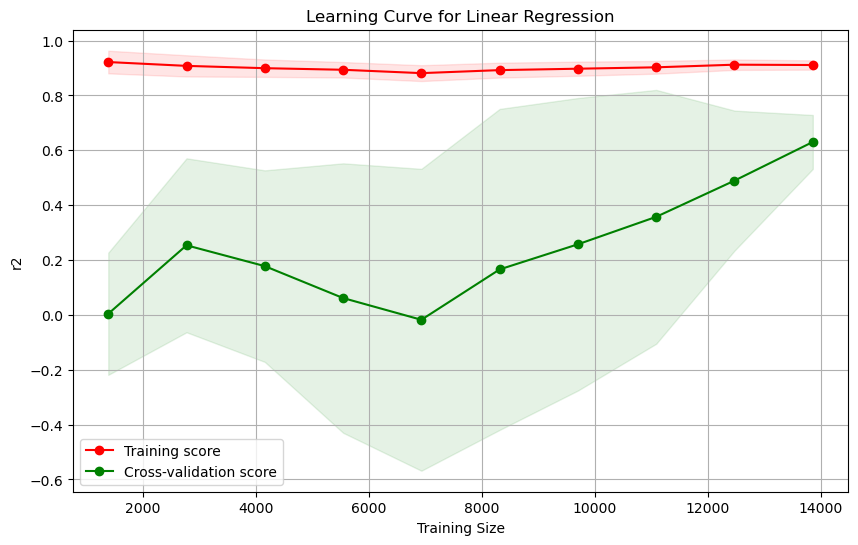

Decision Tree
R²: 0.992, MAE: 0.277, MSE: 0.403

Cross-Validation R² Scores: [0.96171647 0.95002453 0.95642613 0.95352546 0.94967979]
Mean Cross-Validation R²: 0.954, Std Dev: 0.004



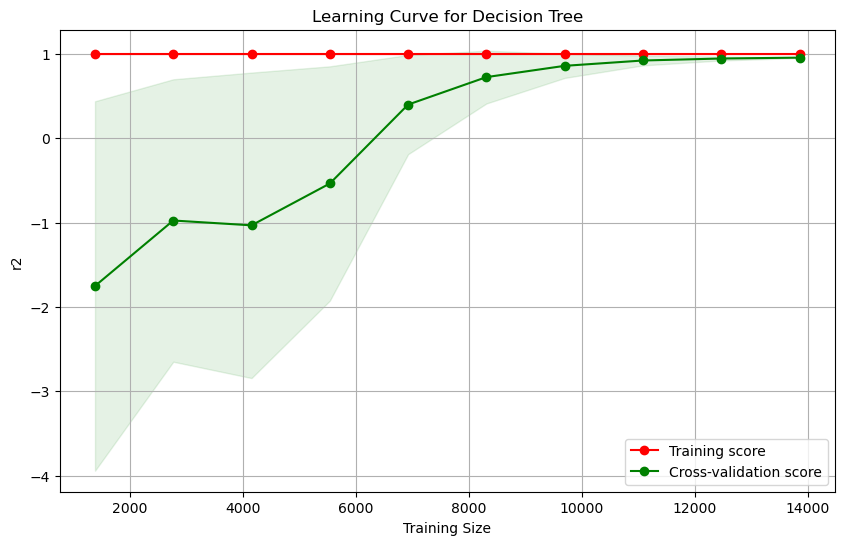

Random Forest
R²: 0.996, MAE: 0.262, MSE: 0.199

Cross-Validation R² Scores: [0.98205642 0.98336295 0.97673833 0.97844537 0.96796495]
Mean Cross-Validation R²: 0.978, Std Dev: 0.005



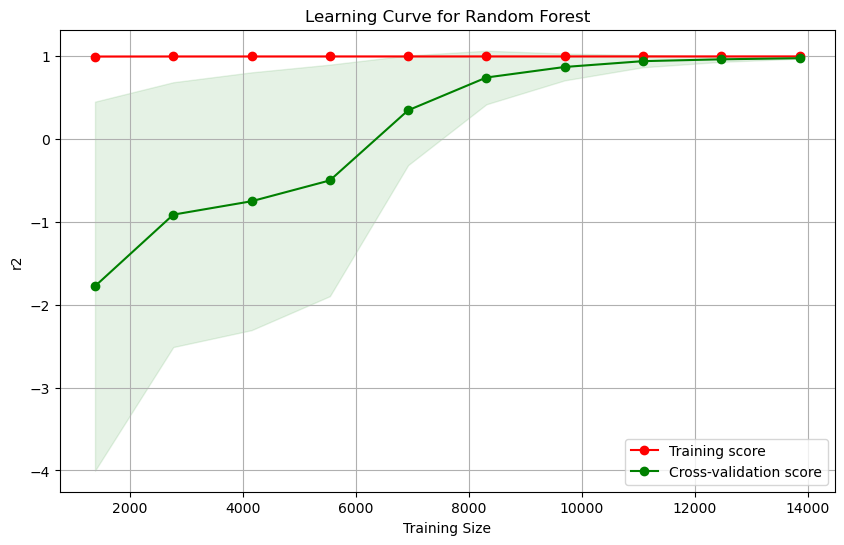

In [371]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, model_name, cv=5, scoring='r2'):
    """
    Plots learning curves to assess overfitting or underfitting.

    Args:
    model: Machine learning model (e.g., RandomForestRegressor)
    X: Features
    y: Target variable
    model_name: Name of the model (for plot title)
    cv: Number of cross-validation folds
    scoring: Scoring metric (default is R²)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    # Compute mean and standard deviation of training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title(f"Learning Curve for {model_name}")
    plt.xlabel("Training Size")
    plt.ylabel(scoring)
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# List of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100)
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"{name}\nR²: {r2:.3f}, MAE: {mae:.3f}, MSE: {mse:.3f}\n")

    # Perform 5-fold cross-validation using R² as the scoring metric
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"Cross-Validation R² Scores: {cv_scores}")
    print(f"Mean Cross-Validation R²: {cv_scores.mean():.3f}, Std Dev: {cv_scores.std():.3f}\n")

    plot_learning_curve(model, X, y, name)

In [372]:
param_grid_dt = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],       # Number of trees in the forest
    'max_depth': [10, 20, 30, None],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required at each leaf node
    'max_features': ['log2', 'sqrt', None]       # Number of features to consider when looking for the best split
}


# Random Forest GridSearchCV
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='r2', error_score='raise', verbose=2, n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best parameters and performance for Random Forest
print("Best parameters for Random Forest:", grid_rf.best_params_)
y_pred_rf = grid_rf.best_estimator_.predict(X_test)
print(f"Random Forest - R²: {r2_score(y_test, y_pred_rf):.3f}, MAE: {mean_absolute_error(y_test, y_pred_rf):.3f}, MSE: {mean_squared_error(y_test, y_pred_rf):.3f}")

# Decision Tree GridSearchCV
dt = DecisionTreeRegressor(random_state=42)
grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='r2', verbose=2, n_jobs=-1)
grid_dt.fit(X_train, y_train)

# Best parameters and performance for Decision Tree
print("Best parameters for Decision Tree:", grid_dt.best_params_)
y_pred_dt = grid_dt.best_estimator_.predict(X_test)
print(f"Decision Tree - R²: {r2_score(y_test, y_pred_dt):.3f}, MAE: {mean_absolute_error(y_test, y_pred_dt):.3f}, MSE: {mean_squared_error(y_test, y_pred_dt):.3f}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   4.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   6.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimato

In [380]:
# Train the Random Forest Regressor with the best parameters
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    max_features=None,
    min_samples_leaf=2,
    min_samples_split=2,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Random Forest - R²: {r2:.3f}, MAE: {mae:.3f}, MSE: {mse:.3f}")

Random Forest - R²: 0.996, MAE: 0.255, MSE: 0.192



Top 10 Important Features:
                     Feature  Importance
2                      Value    0.899869
0                        Age    0.059682
1                  Potential    0.035510
10                 ShotPower    0.000712
14                    Vision    0.000569
13                Aggression    0.000518
8                BallControl    0.000399
4   International Reputation    0.000365
6                   Crossing    0.000336
9                  Reactions    0.000322


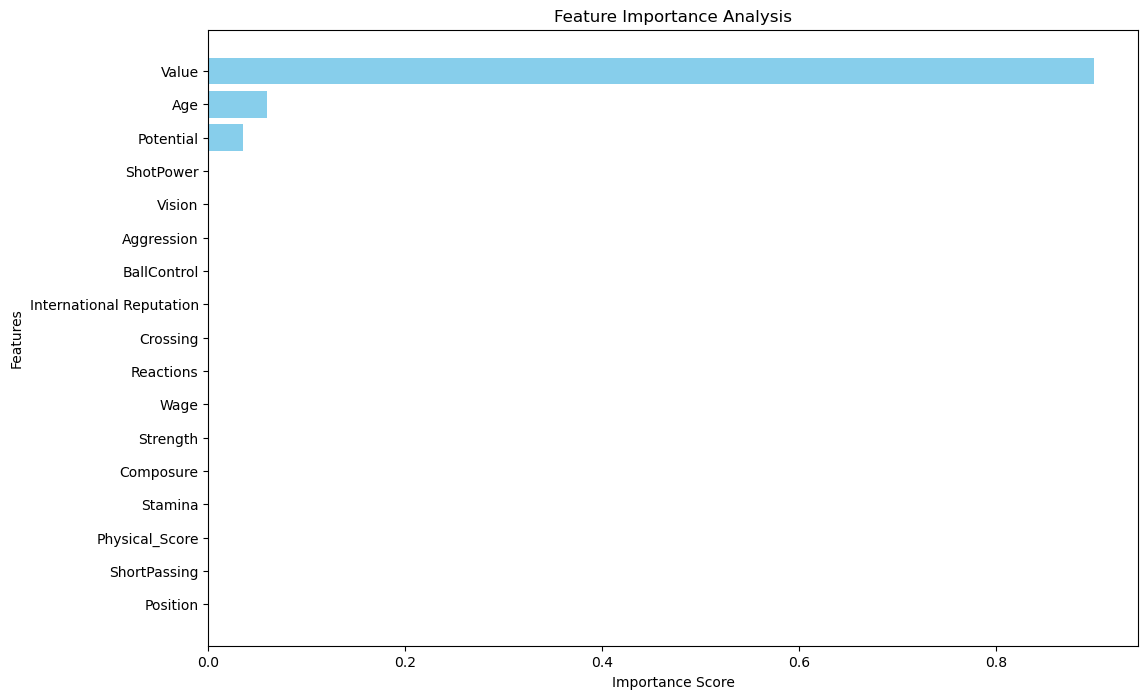

In [381]:
# Feature importance analysis
feature_importances = rf_model.feature_importances_

# Convert feature importances to DataFrame using original column names
features_df = pd.DataFrame({
    'Feature': X_train.columns,  # Use the original DataFrame's columns
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("\nTop 10 Important Features:")
print(features_df.head(10))

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

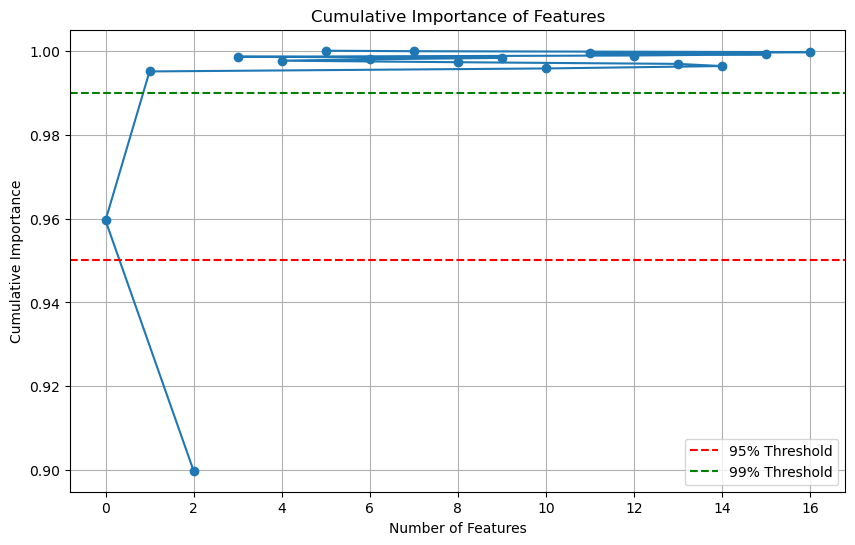

Number of features covering 95% of importance: 1


In [382]:
# Sort features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Compute cumulative importance
features_df['Cumulative Importance'] = features_df['Importance'].cumsum()

# Plot cumulative importance
plt.figure(figsize=(10, 6))
plt.plot(features_df['Cumulative Importance'], marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.axhline(y=0.99, color='g', linestyle='--', label='99% Threshold')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.legend()
plt.grid(True)
plt.show()

# Find the number of features needed for 95% importance
num_features_95 = (features_df['Cumulative Importance'] <= 0.95).sum()
print(f"Number of features covering 95% of importance: {num_features_95}")

In [383]:
# Display the top 14 most important features
print("\nTop Important Features:")
print(features_df)


Top Important Features:
                     Feature  Importance  Cumulative Importance
2                      Value    0.899869               0.899869
0                        Age    0.059682               0.959552
1                  Potential    0.035510               0.995061
10                 ShotPower    0.000712               0.995774
14                    Vision    0.000569               0.996343
13                Aggression    0.000518               0.996861
8                BallControl    0.000399               0.997260
4   International Reputation    0.000365               0.997625
6                   Crossing    0.000336               0.997961
9                  Reactions    0.000322               0.998283
3                       Wage    0.000290               0.998572
12                  Strength    0.000286               0.998859
15                 Composure    0.000274               0.999133
11                   Stamina    0.000273               0.999406
16            P

In [378]:
# List of features to drop based on importance threshold
low_importance_features = ['FKAccuracy', 'Best Position','Body Type','Work Rate','Preferred Foot']

# Drop the low-importance features from the dataset
df_dropped = df.drop(columns=low_importance_features)

print(f"Remaining columns after dropping low-importance features: {df_dropped.columns.tolist()}")

Remaining columns after dropping low-importance features: ['Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 'Position', 'Crossing', 'ShortPassing', 'BallControl', 'Reactions', 'ShotPower', 'Stamina', 'Strength', 'Aggression', 'Vision', 'Composure', 'Physical_Score']


In [379]:
# Define features (X) and target (y)
X = df_dropped.drop('Overall', axis=1)
y = df_dropped['Overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training set only
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model with the best hyperparameters
rf_model_reduced = RandomForestRegressor(
    n_estimators=300,
    max_depth=30,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
rf_model_reduced.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_reduced = rf_model_reduced.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred_reduced)
mae = mean_absolute_error(y_test, y_pred_reduced)
mse = mean_squared_error(y_test, y_pred_reduced)

print(f"Random Forest (Reduced Features) - R²: {r2:.3f}, MAE: {mae:.3f}, MSE: {mse:.3f}")

Random Forest (Reduced Features) - R²: 0.990, MAE: 0.492, MSE: 0.492


In [ ]:
# param_grid_rf_reduced = {
#     'n_estimators': [100, 200, 300, 500],  # Number of trees
#     'max_depth': [10, 20, 30, None],       # Maximum depth of the trees
#     'min_samples_split': [2, 5, 10],       # Minimum samples required to split a node
#     'min_samples_leaf': [1, 2, 4],         # Minimum samples required at a leaf node
#     'max_features': ['sqrt', 'log2']       # Number of features to consider for best split
# }

# # Initialize the Random Forest Regressor
# rf = RandomForestRegressor(random_state=42)

# # Initialize GridSearchCV
# grid_search_rf = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid_rf_reduced,
#     cv=5,                 # 5-fold cross-validation
#     scoring='r2',         # Use R² as the evaluation metric
#     verbose=2,            # Show progress
#     n_jobs=-1             # Use all available cores
# )

# # Fit GridSearchCV on the training data
# grid_search_rf.fit(X_train, y_train)

# # Get the best parameters and score
# print("Best parameters for Random Forest (Reduced Features):", grid_search_rf.best_params_)
# print(f"Best R² score from GridSearchCV: {grid_search_rf.best_score_:.3f}")

# # Evaluate the best model on the test set
# best_rf_model_reduced = grid_search_rf.best_estimator_
# y_pred_best = best_rf_model_reduced.predict(X_test)

# r2_best = r2_score(y_test, y_pred_best)
# mae_best = mean_absolute_error(y_test, y_pred_best)
# mse_best = mean_squared_error(y_test, y_pred_best)

# print(f"Random Forest (Tuned on Reduced Features) - R²: {r2_best:.3f}, MAE: {mae_best:.3f}, MSE: {mse_best:.3f}")

# Exporting The Trained Model

In [ ]:
from joblib import dump, load

# Save the best model to a file
dump(best_rf_model_reduced, 'best_rf_model.joblib')
print("Model saved successfully as 'best_rf_model.joblib'.")

# Load the model from the file
loaded_model = load('best_rf_model.joblib')

# Test the loaded model by predicting on the test set
y_pred_loaded = loaded_model.predict(X_test)
print(f"Loaded Model - R²: {r2_score(y_test, y_pred_loaded):.3f}")

In [ ]:
# 9446440888
# https://www.linkedin.com/in/abhimanyuks/


[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  23.2s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  34.1s
[CV] END max_depth=30, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  33.2s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=  20.9s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  10.7s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  10.4s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  21.2s
[CV] END max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  10.5s
[CV] END max_depth=30, max_features=N